In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from random import randint

# Data sources
#
#   - Inhabitants' median disposable monetary income by postal code area, 2010-2021
#     https://pxdata.stat.fi:443/PxWeb/sq/39625562-d250-492a-a190-37bcc355e2a3
#
#   - Prices per square meter of old dwellings in housing companies and numbers
#     of transactions by postal code area, yearly, 2009-2022
#     https://pxdata.stat.fi:443/PxWeb/sq/41826b15-82a9-4c83-8be6-bd77f98b31ac
#

# Output control. True and more output will be generated.
DO_CORRELATION_PLOTS = True

# Read in what we've got.
incomes = pd.read_csv('data/003_12f1_2021_20230929-100110.csv',
                      encoding = 'latin1',
                      na_values = [ '0' ],
                      skiprows = [0, 1])
prices = pd.read_csv('data/001_13mu_2022_20230929-105546.csv',
                     encoding = 'latin1',
                     na_values = [ '.', '..', '...' ],
                     skiprows = [0, 1])

In [2]:
# A few peeks in to the data we just read.
print(f'Income/Price data shape: {incomes.shape}/{prices.shape}\n')

print(incomes.iloc[[randint(0, incomes.shape[0])]].to_string())
print(prices.iloc[[randint(0, prices.shape[0])]].to_string())

Income/Price data shape: (84, 14)/(81, 17)

                                       Postal code area                        Information     2010     2011     2012     2013     2014     2015     2016     2017     2018     2019     2020     2021
40  00560  Toukola - Kumpula - Vanhakaupunki (Helsinki)  Median income of inhabitants (HR)  21223.0  21674.0  22792.0  22985.0  23497.0  23797.0  24297.0  24802.0  25315.0  26029.0  26175.0  26788.0
                  Postal code                   Building type                      Information    2009    2010    2011    2012    2013    2014    2015    2016    2017    2018    2019    2020    2021    2022
43  00600  Koskela (Helsinki)  Blocks of flats, two-room flat  Price per square meter (EUR/m2)  2660.0  2589.0  2728.0  2781.0  2709.0  2959.0  2626.0  3152.0  3307.0  3026.0  2985.0  3470.0  3305.0  4099.0


In [3]:
# Drop unwanted columns for ease of use later on.
incomes.drop('Information', axis = 1, inplace = True)
prices.drop([ 'Building type', 'Information' ], axis = 1, inplace = True)

# Since we do not have income data for years 2009 and 2022, we don't need pricing data for those either.
prices.drop([ '2009', '2022' ], axis = 1, inplace = True)

# Postal codes are unique, and they're also used as identifiers in GeoJSON
# containing borders of postal code areas; so, we might separate them from
# more traditional names.
prices.insert(loc = 1,
              column = 'Name',
              value = prices['Postal code'].map(lambda _: ' '.join(_.split(' ')[1:])))
prices['Postal code'] = prices['Postal code'].map(lambda _: _.split(' ')[0])
incomes.insert(loc = 0,
               column = 'Name',
               value = incomes['Postal code area'].map(lambda _: ' '.join(_.split(' ')[1:])))
incomes.insert(loc = 0,
               column = 'Postal code',
               value = incomes['Postal code area'].map(lambda _: _.split(' ')[0]))
incomes.drop('Postal code area', axis = 1, inplace = True)


Income/Price data shape: (84, 14)/(81, 14)

   Postal code                      Name     2010     2011     2012     2013  \
50       00660   Länsi-Pakila (Helsinki)  26826.0  27623.0  28313.0  28773.0   

       2014     2015     2016     2017     2018     2019     2020     2021  
50  28917.0  29367.0  29506.0  30046.0  31174.0  32594.0  33051.0  34117.0  
   Postal code                      Name    2010  2011    2012    2013  2014  \
49       00660   Länsi-Pakila (Helsinki)  2572.0   NaN  2714.0  2615.0   NaN   

    2015  2016  2017  2018    2019    2020  2021  
49   NaN   NaN   NaN   NaN  4231.0  4751.0   NaN  


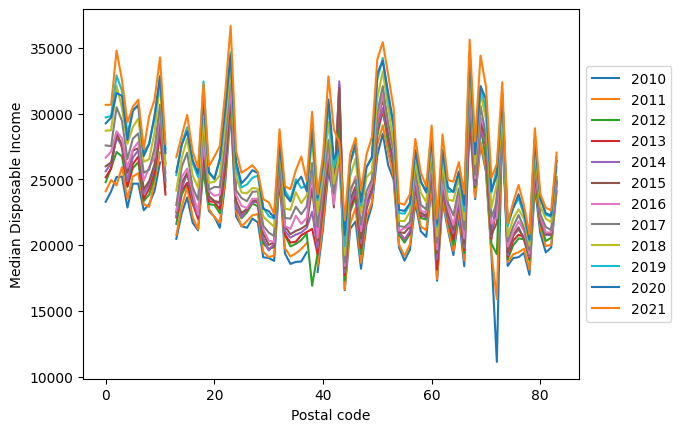

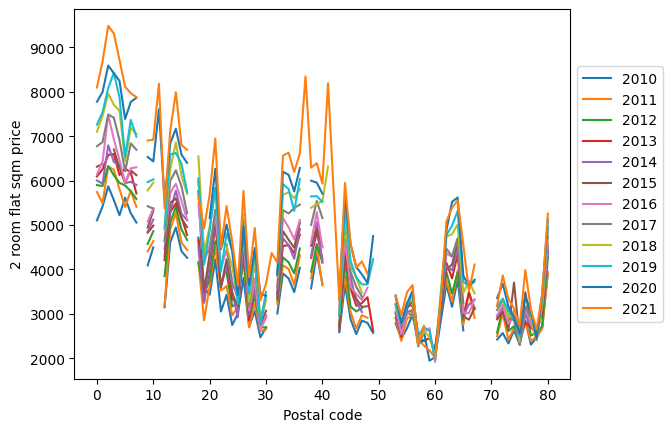

In [4]:
# A few more peeks into the data, which should now appear more uniform than before.
print(f'Income/Price data shape: {incomes.shape}/{prices.shape}\n')

code = incomes.iloc[[randint(0, min(incomes.shape[0], prices.shape[0]))]]['Postal code'].values[0]
print(incomes.loc[incomes['Postal code'] == code])
print(prices.loc[prices['Postal code'] == code])

ax_incomes = incomes.plot()
ax_incomes.set_xlabel('Postal code')
ax_incomes.set_ylabel('Median Disposable Income')
_ = ax_incomes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax_prices = prices.plot()
ax_prices.set_xlabel('Postal code')
ax_prices.set_ylabel('2 room flat sqm price')
_ = ax_prices.legend(loc='center left', bbox_to_anchor=(1, 0.5))


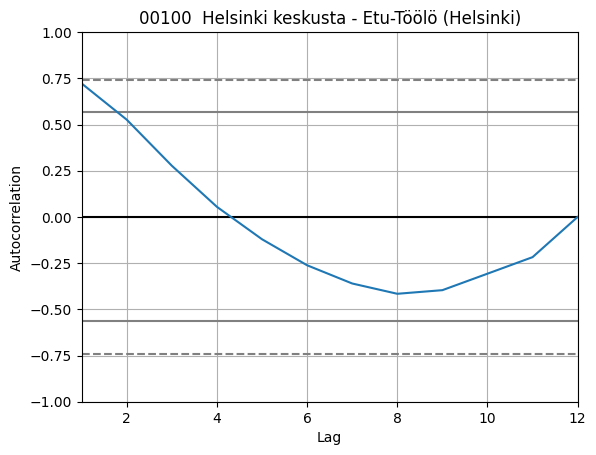

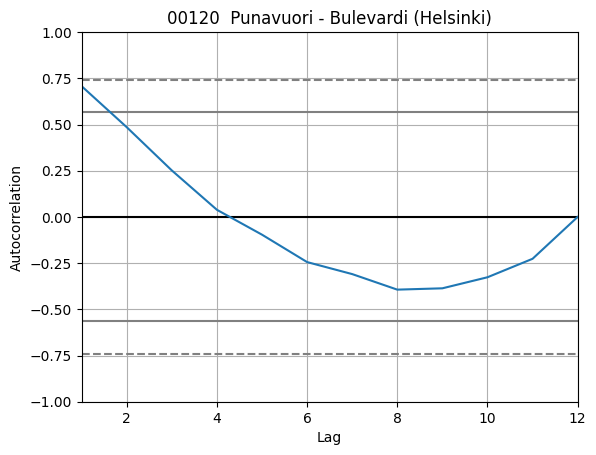

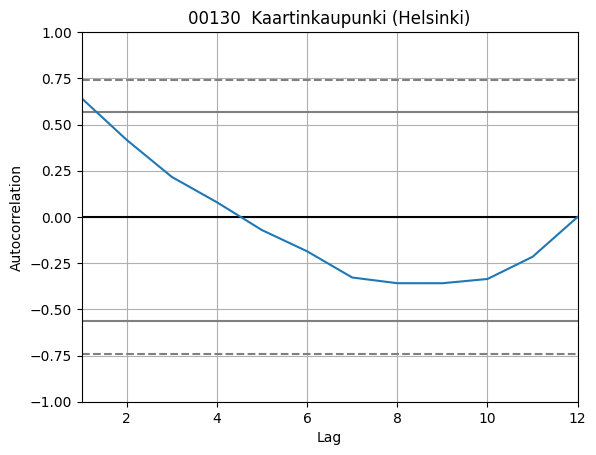

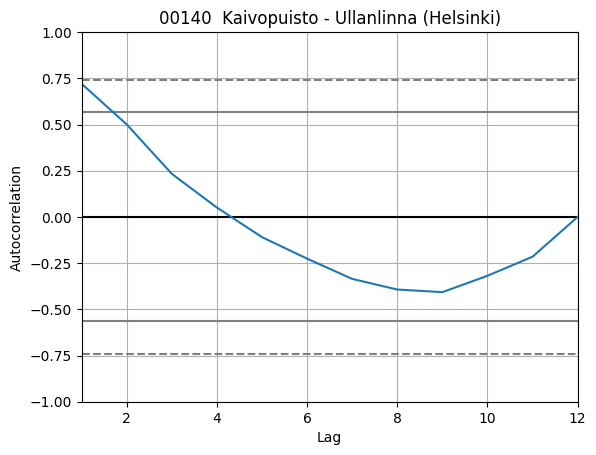

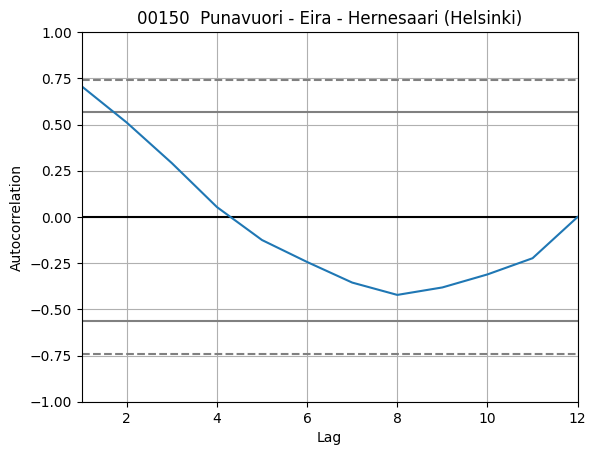

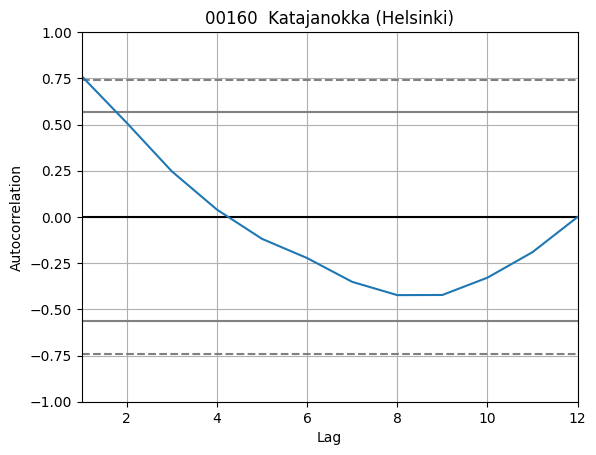

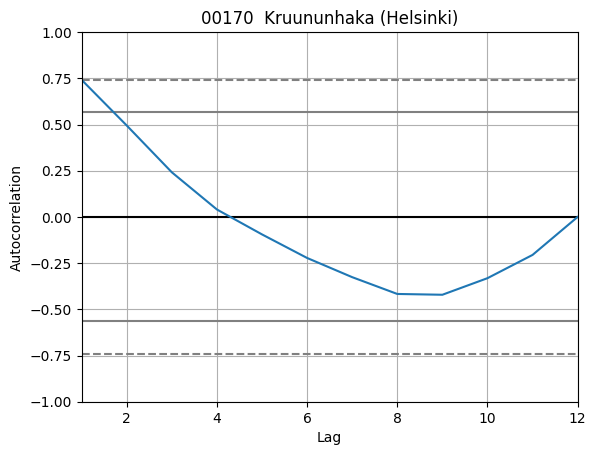

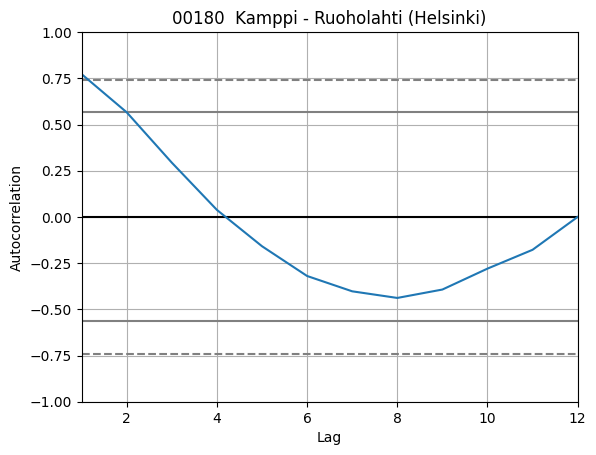

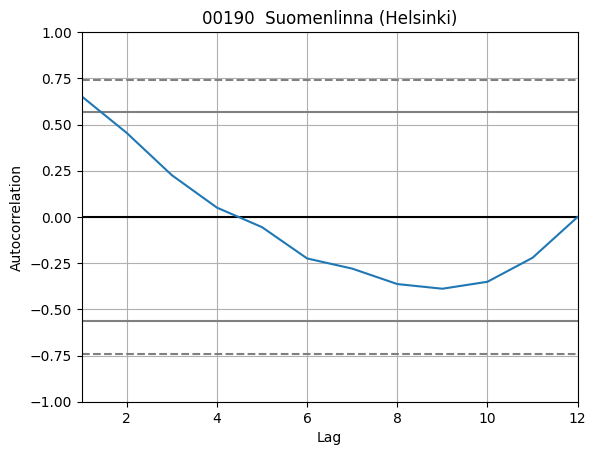

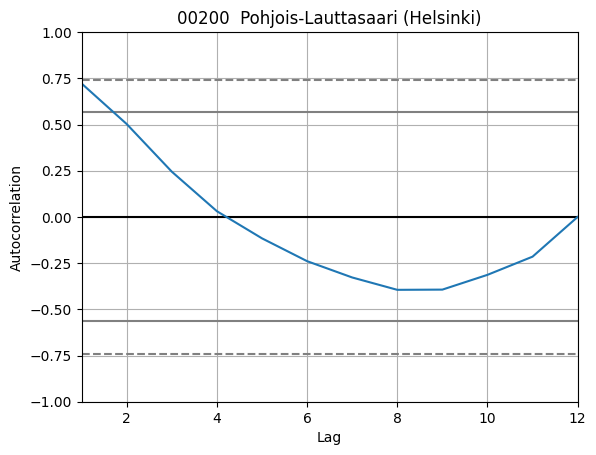

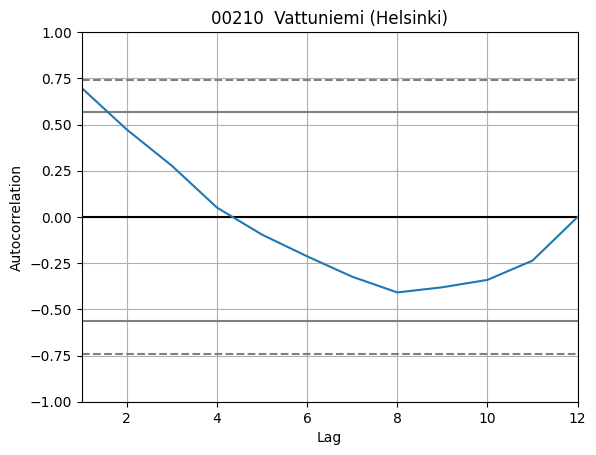

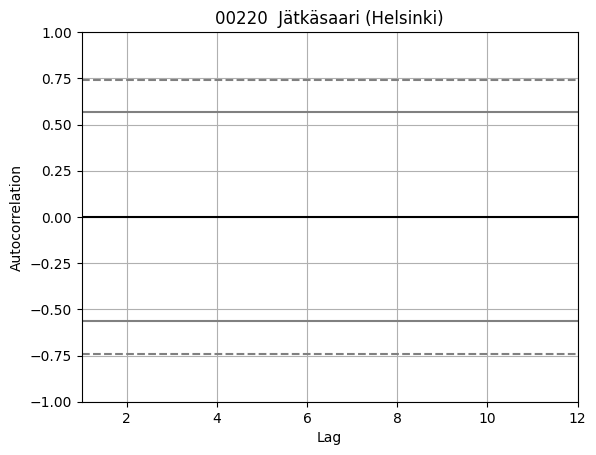

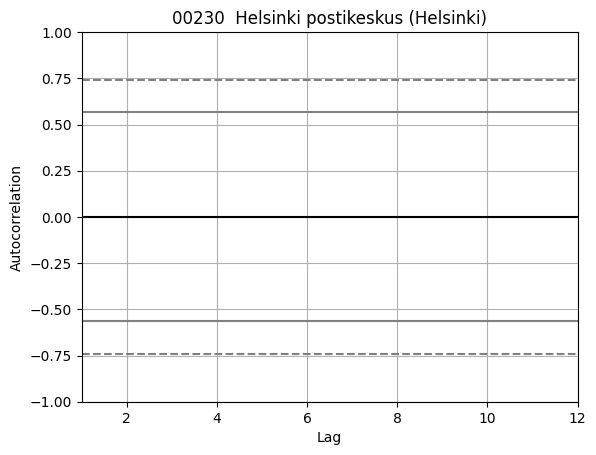

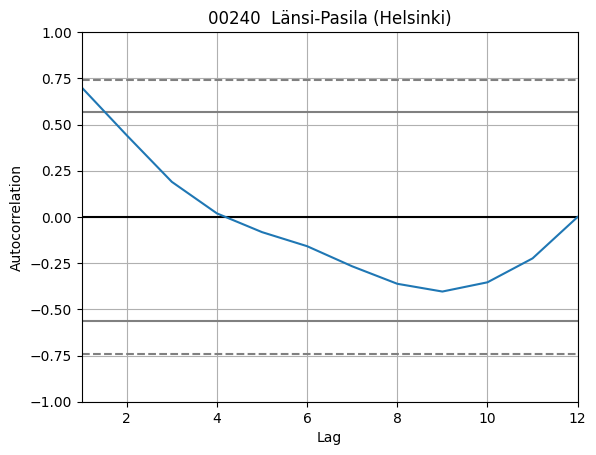

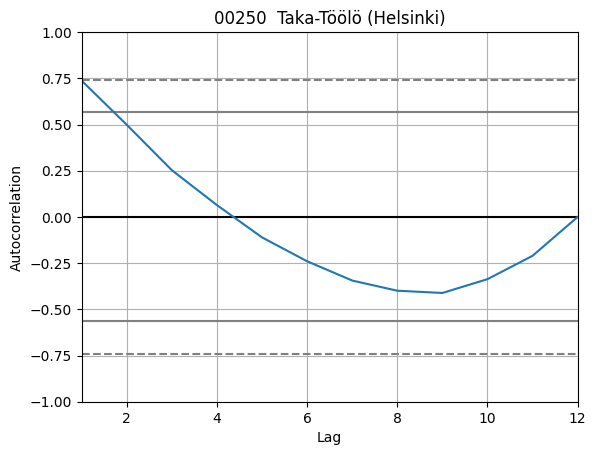

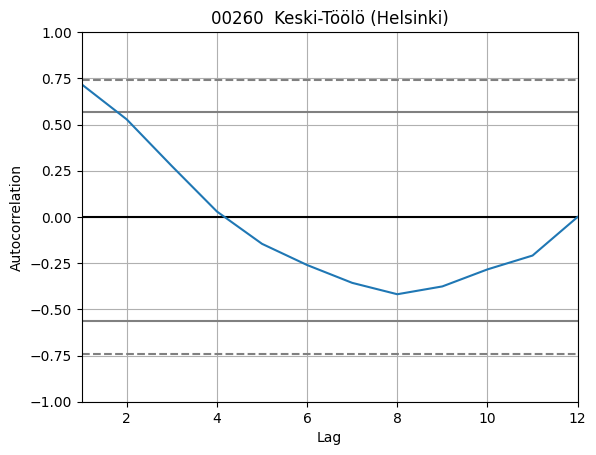

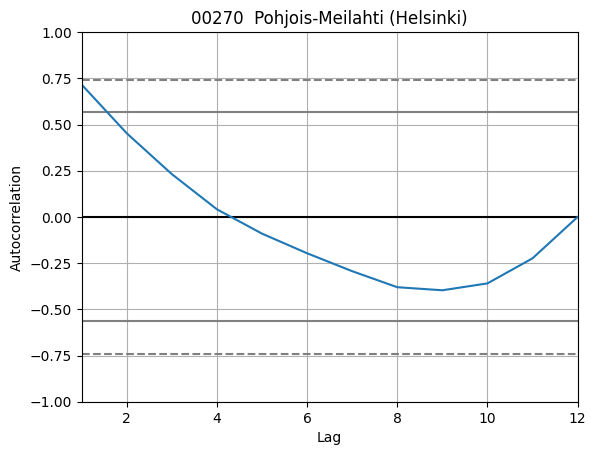

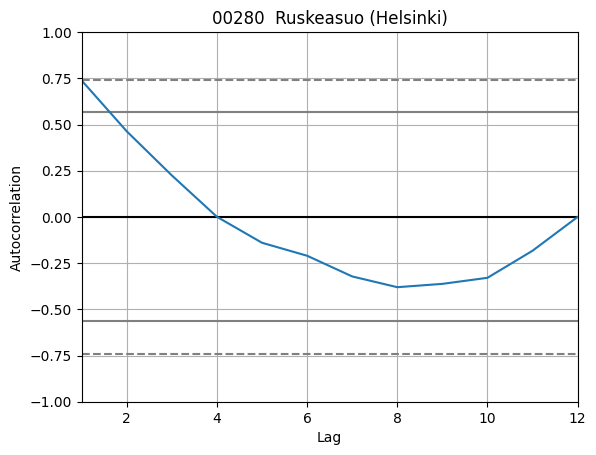

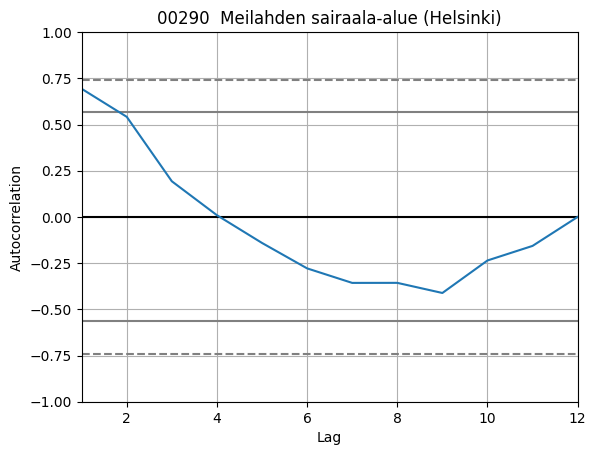

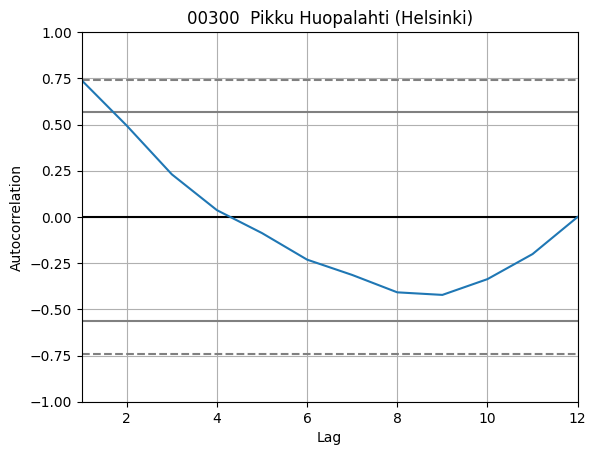

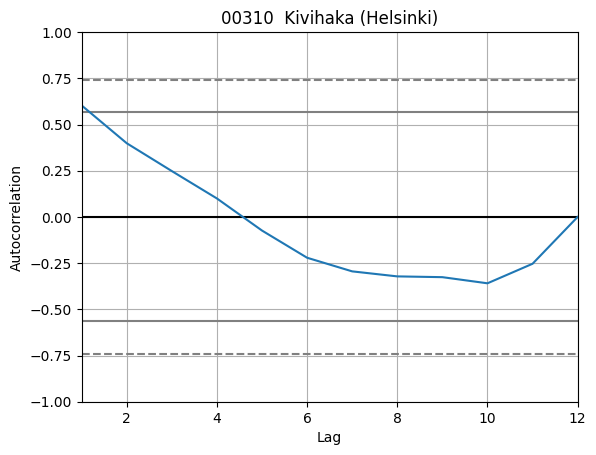

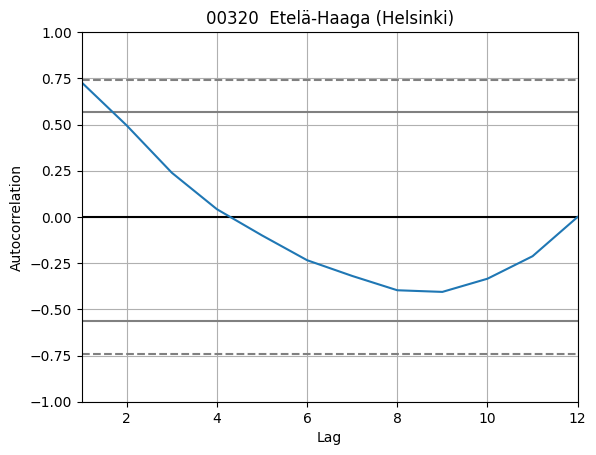

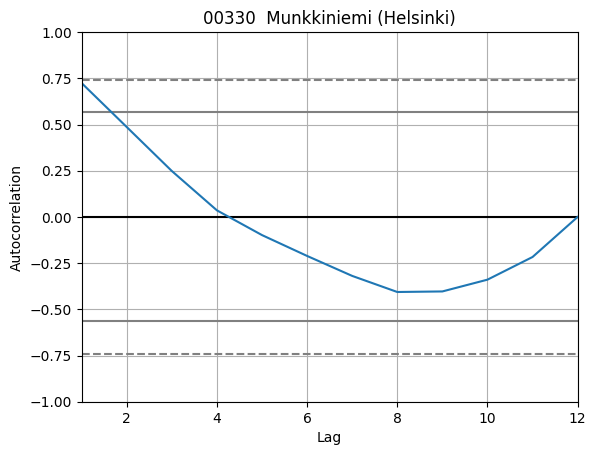

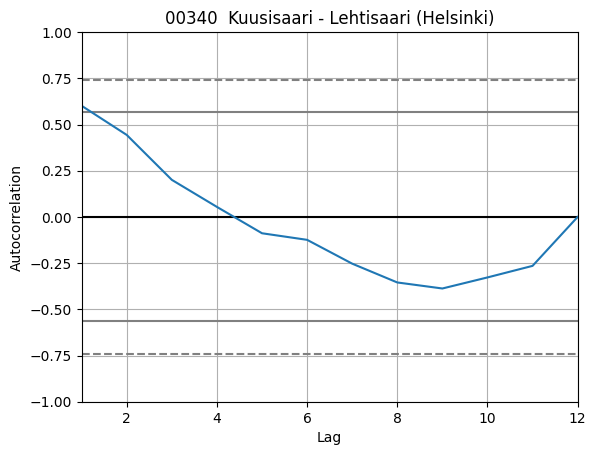

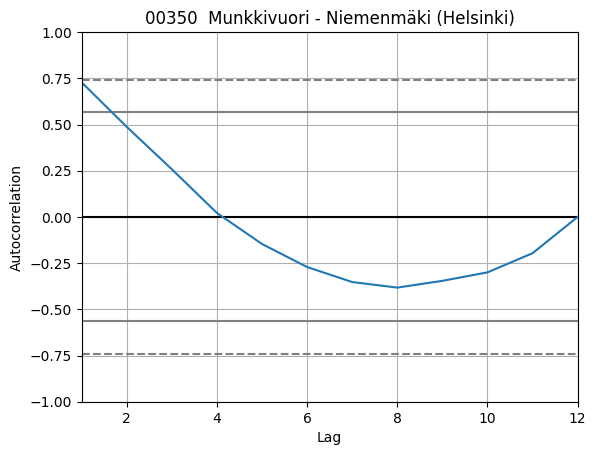

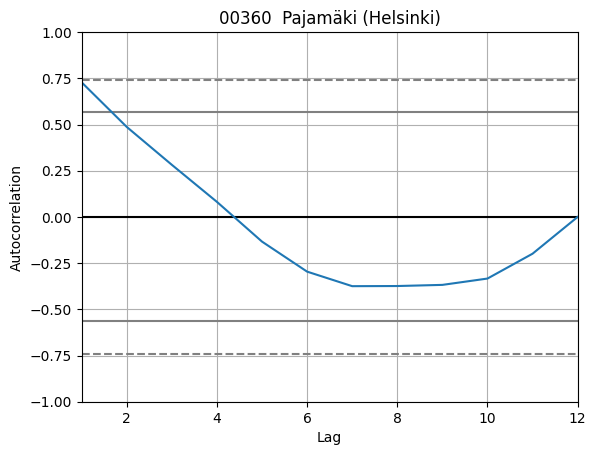

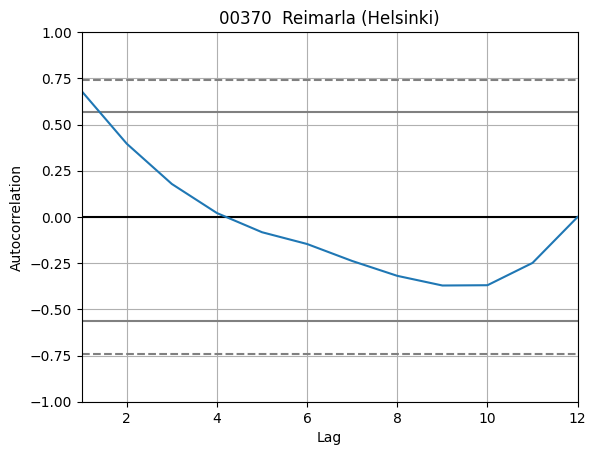

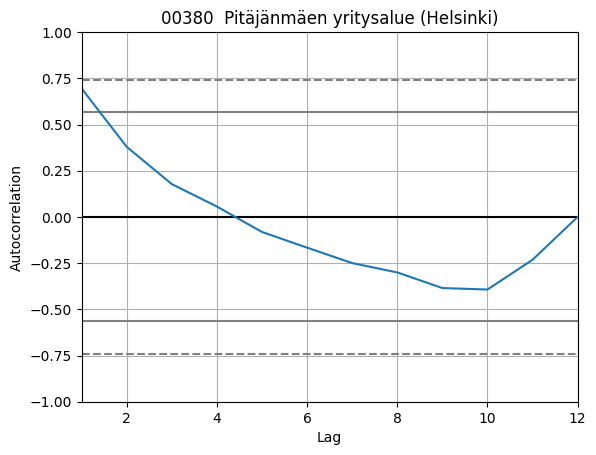

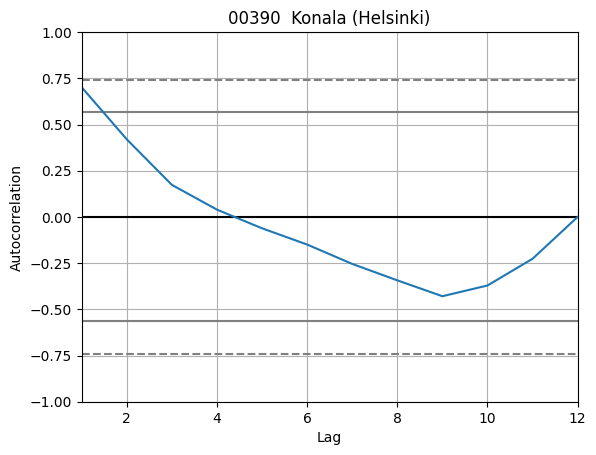

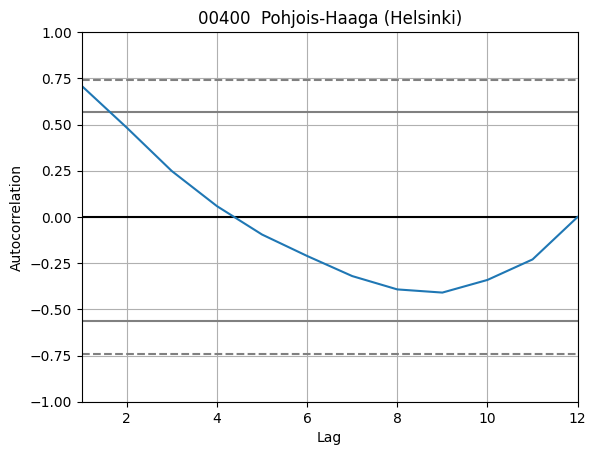

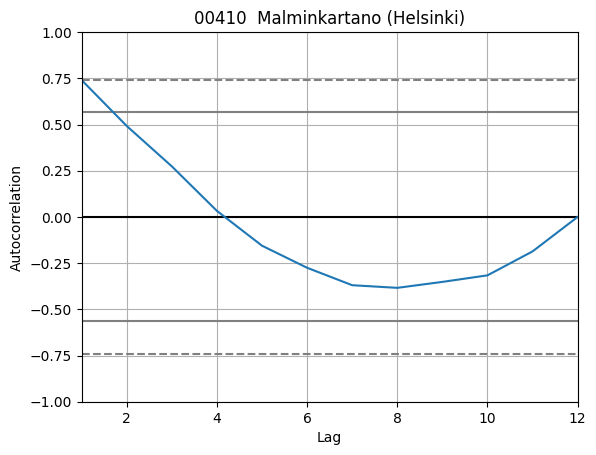

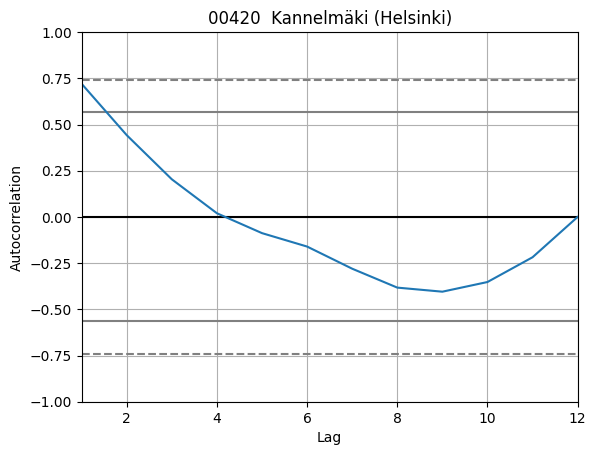

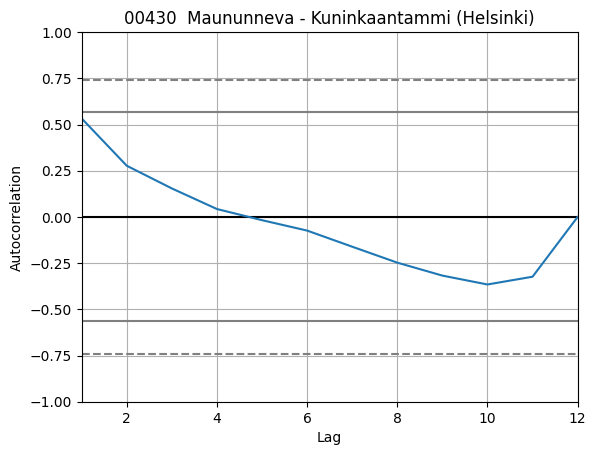

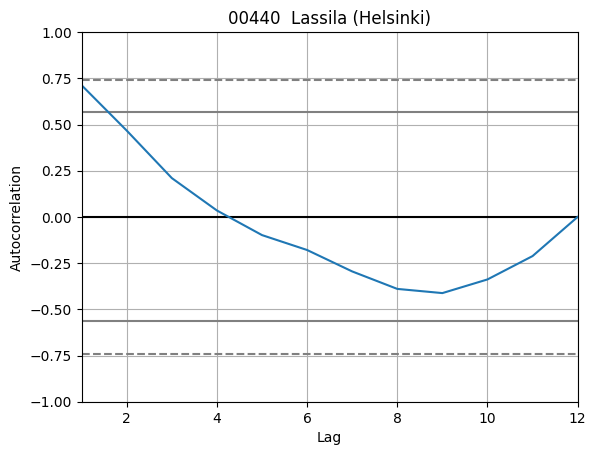

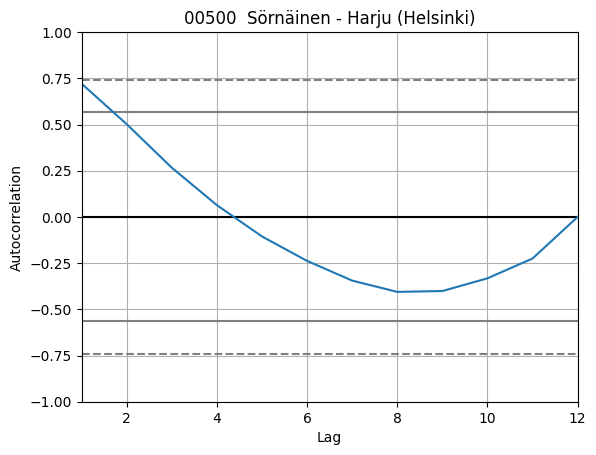

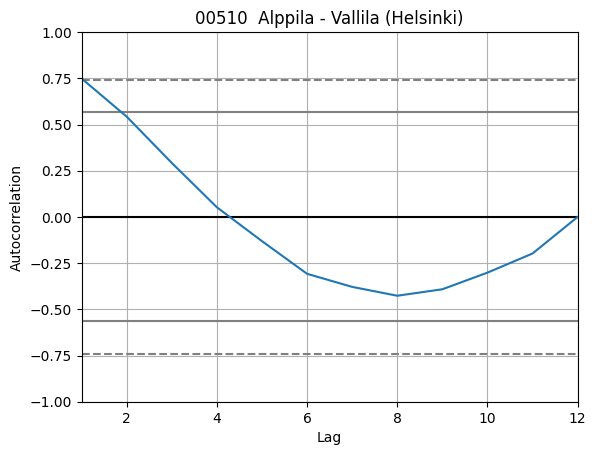

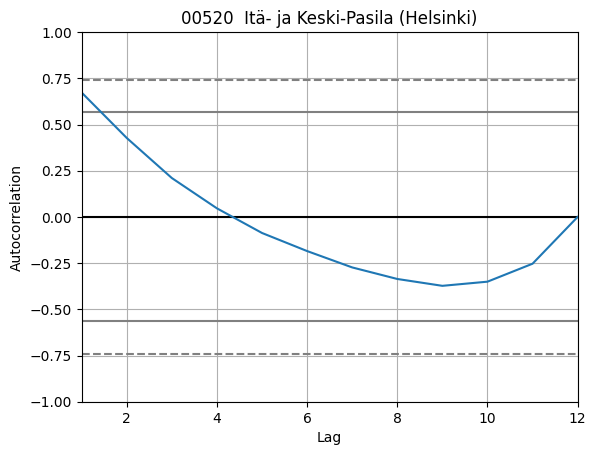

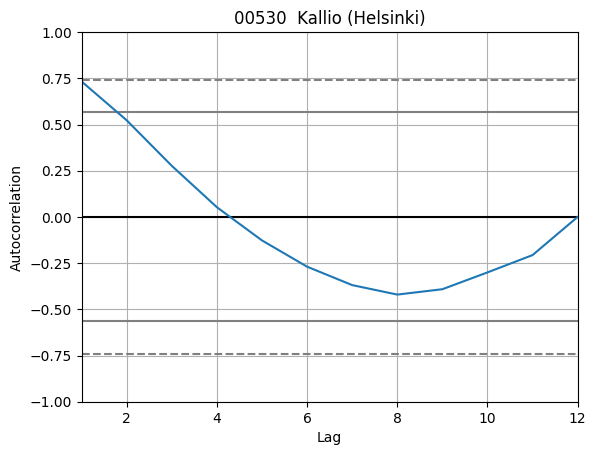

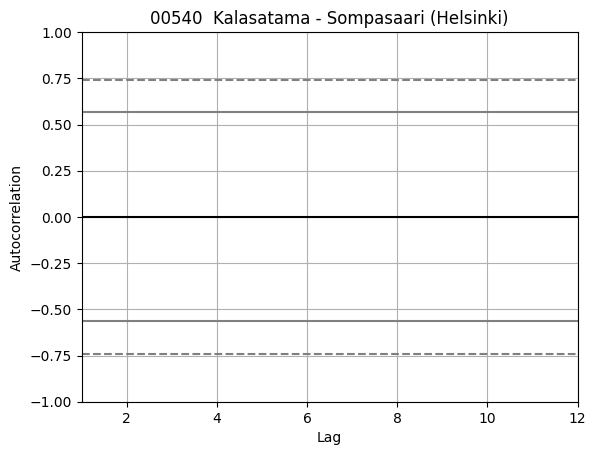

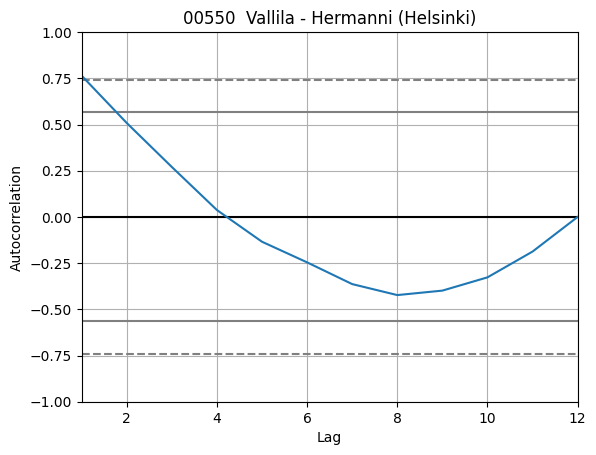

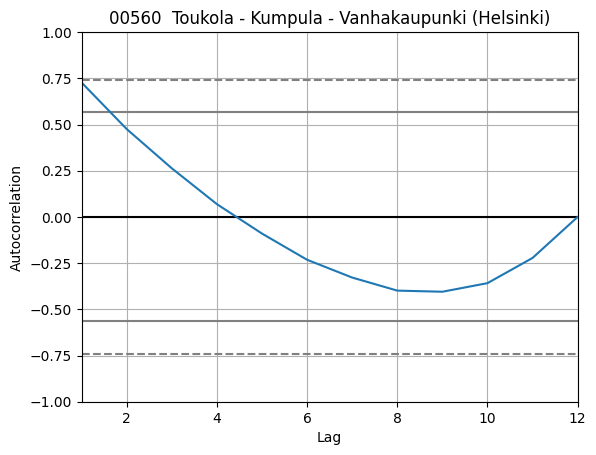

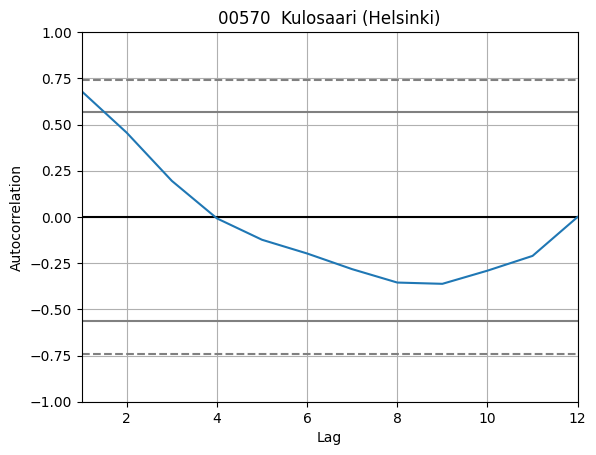

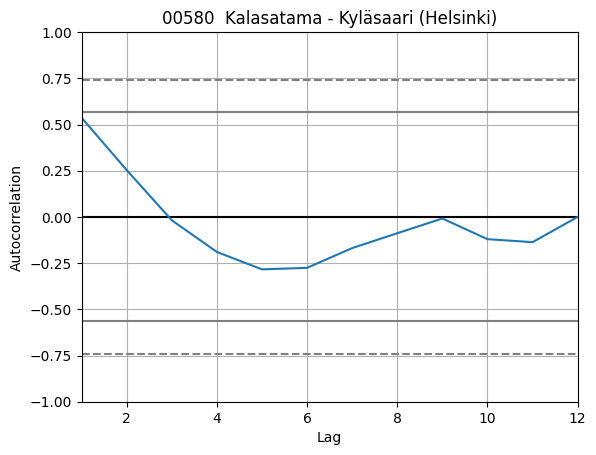

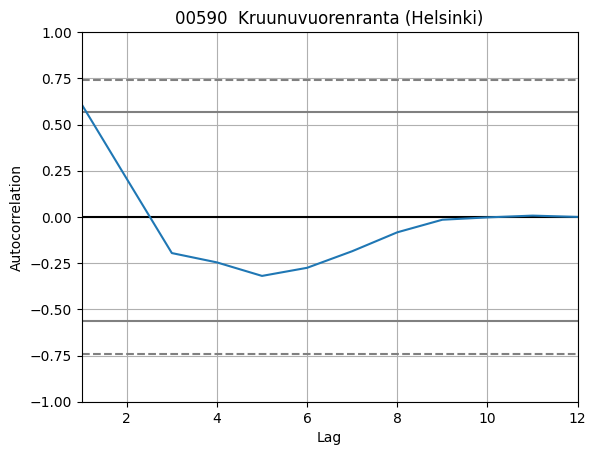

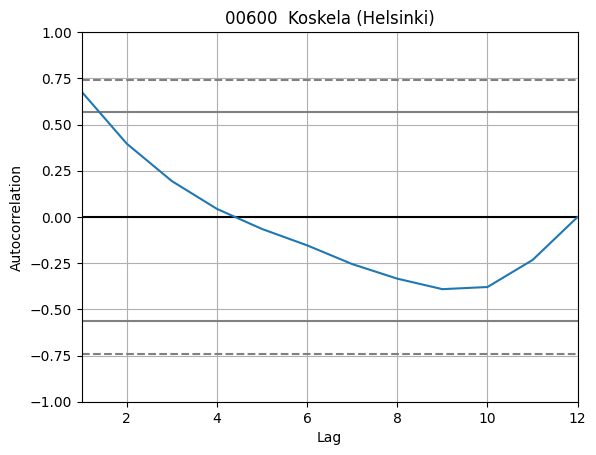

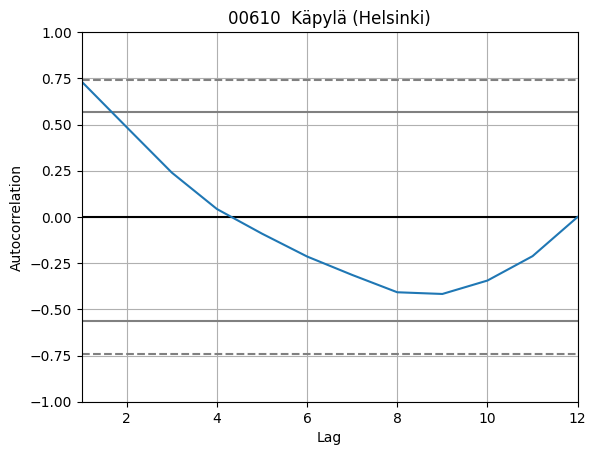

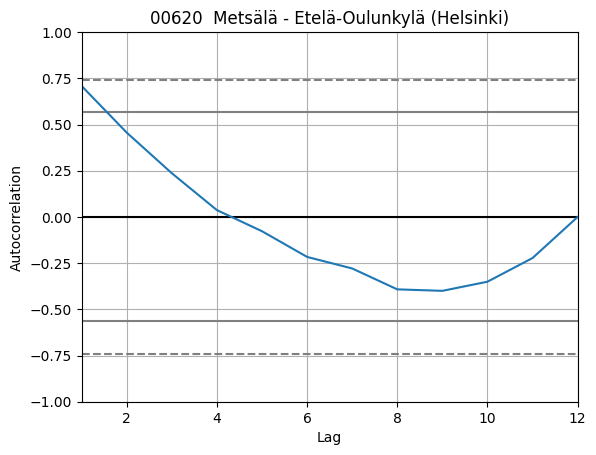

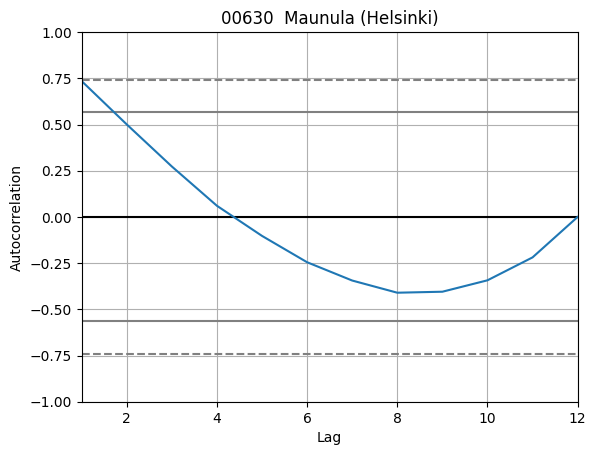

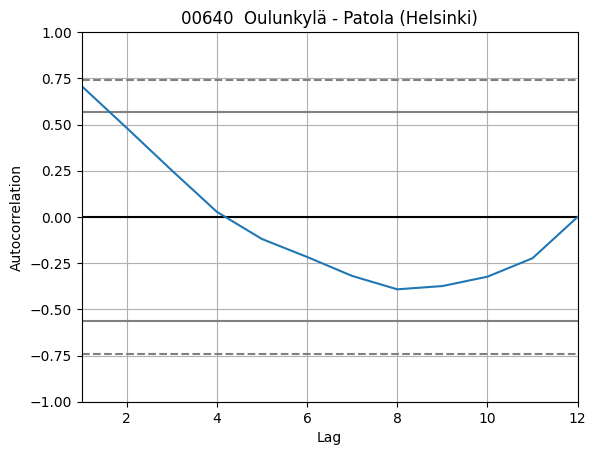

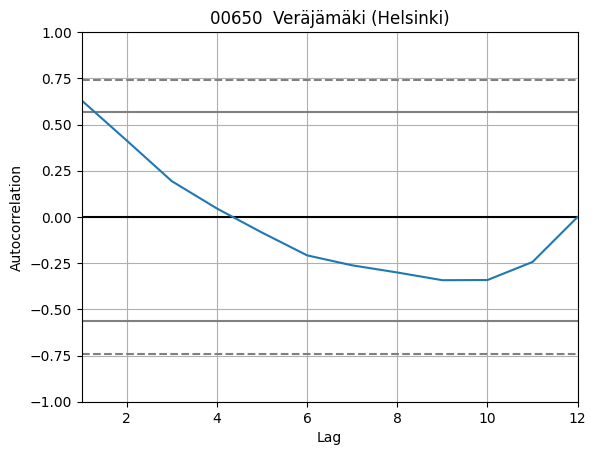

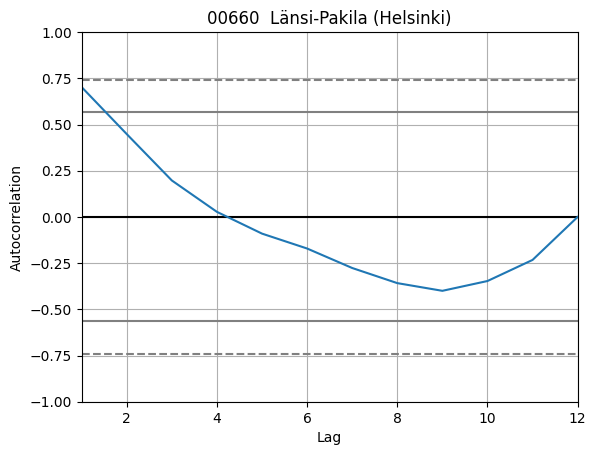

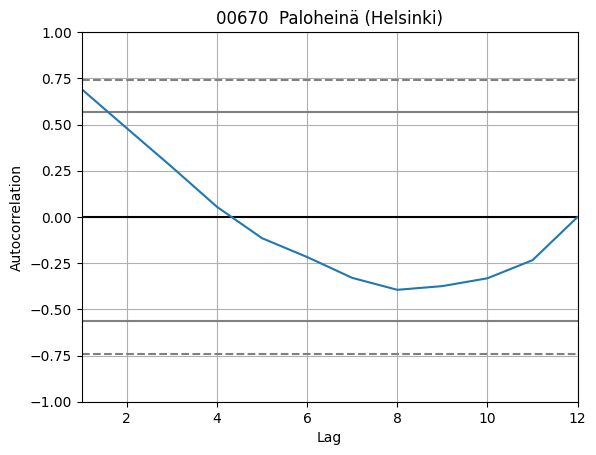

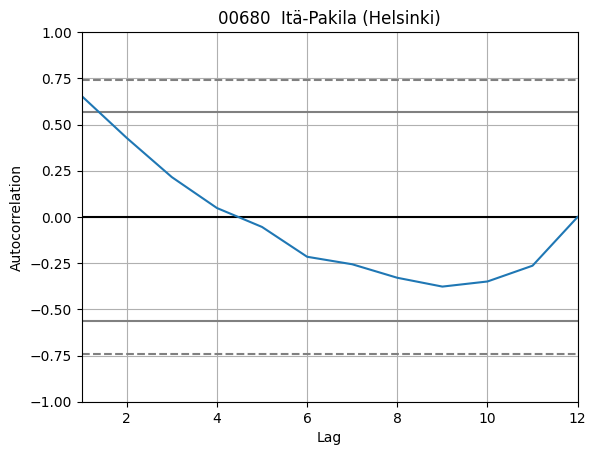

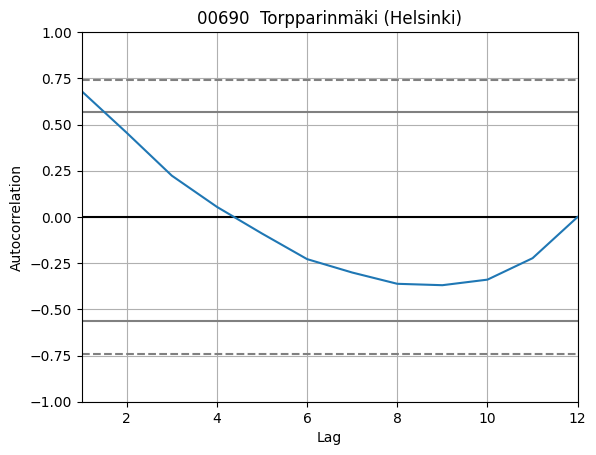

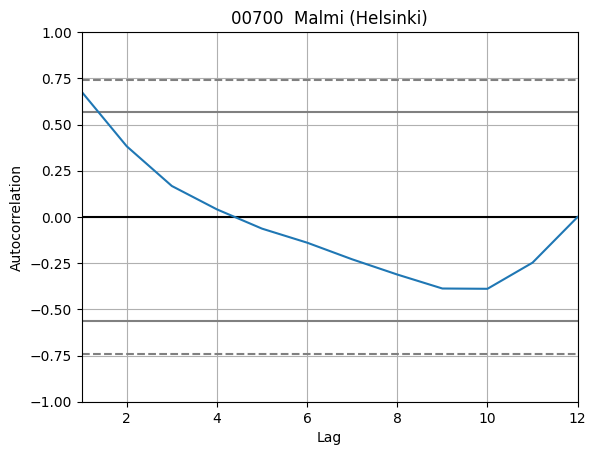

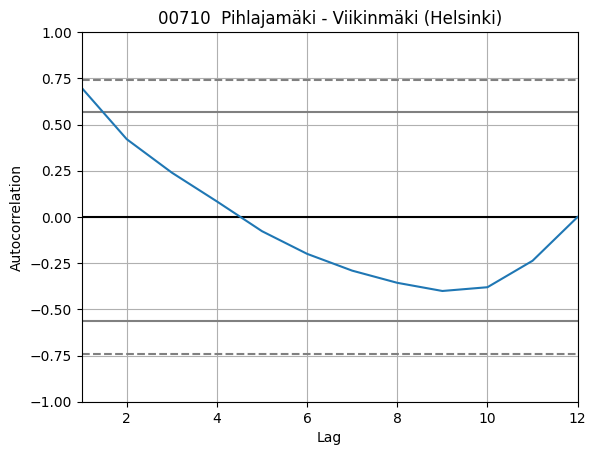

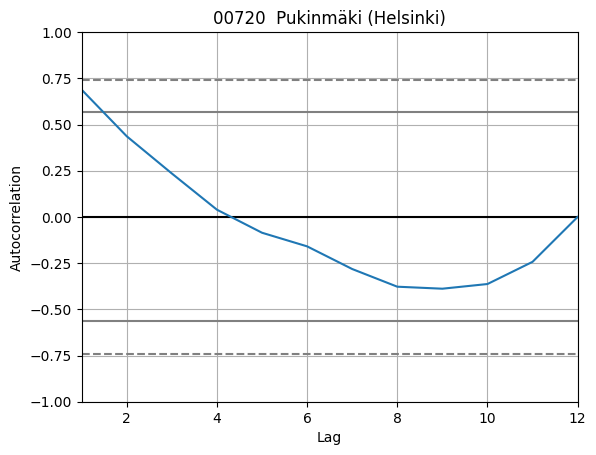

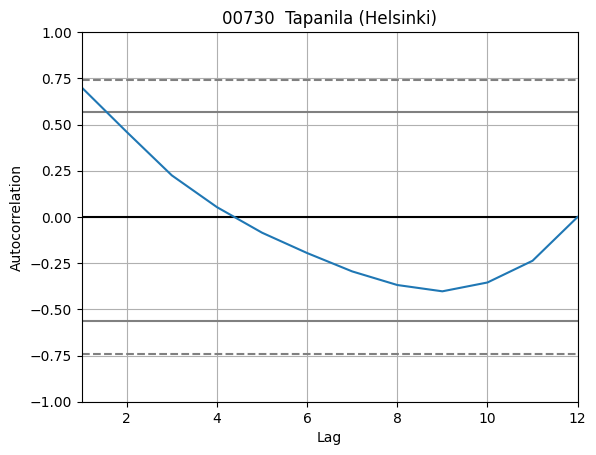

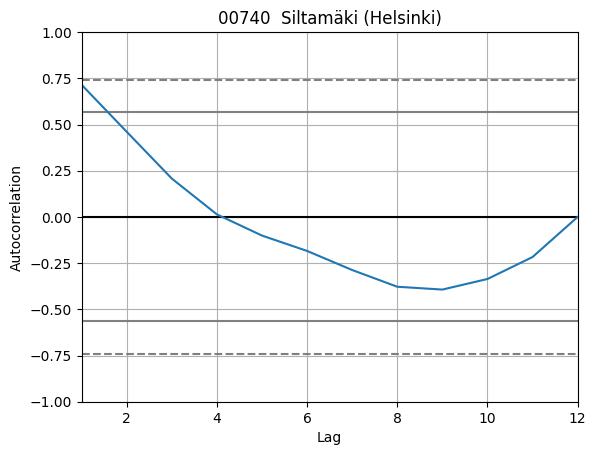

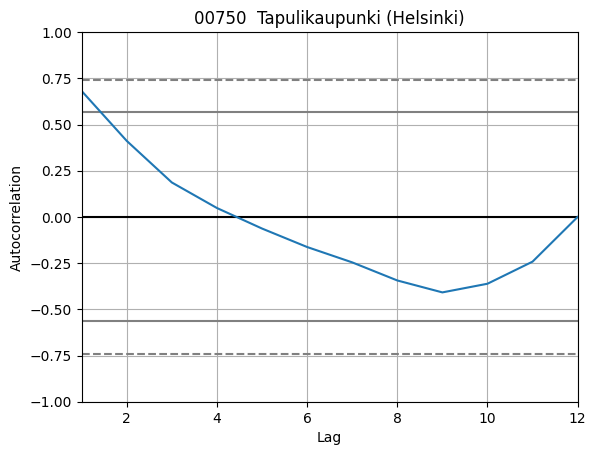

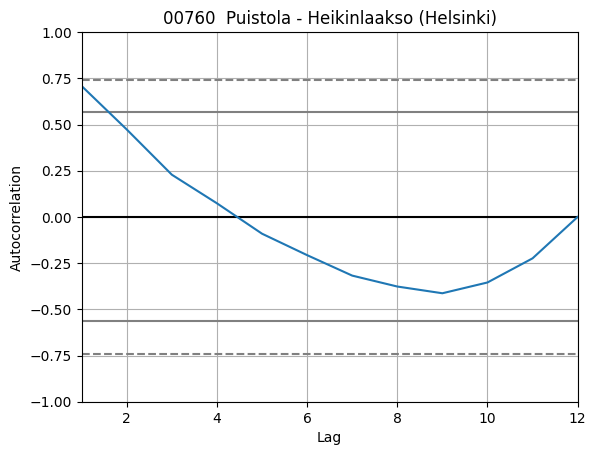

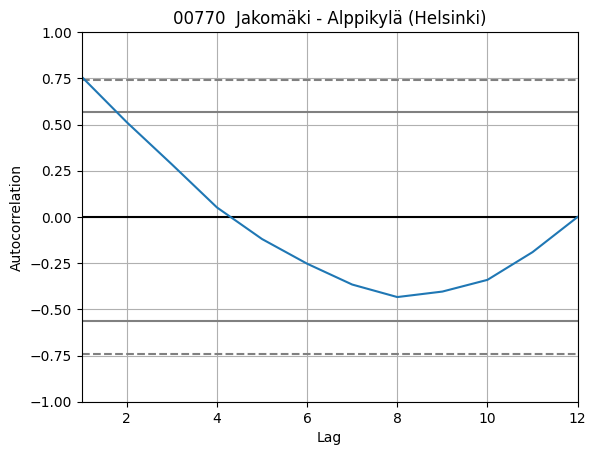

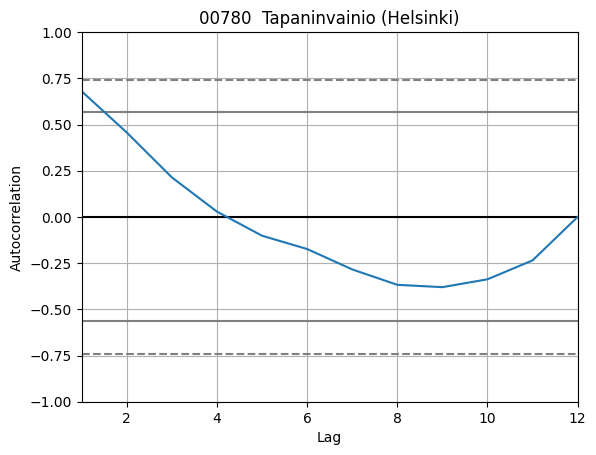

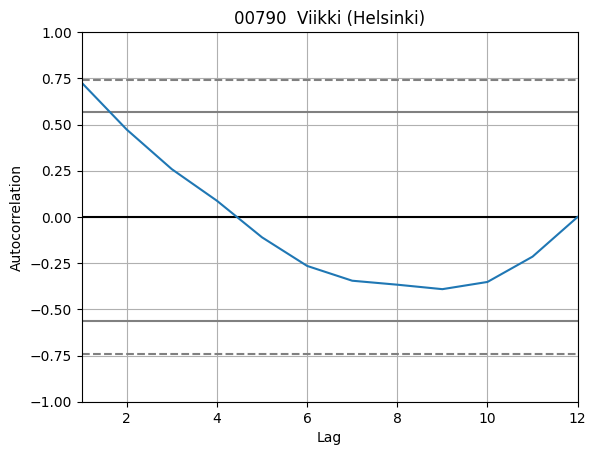

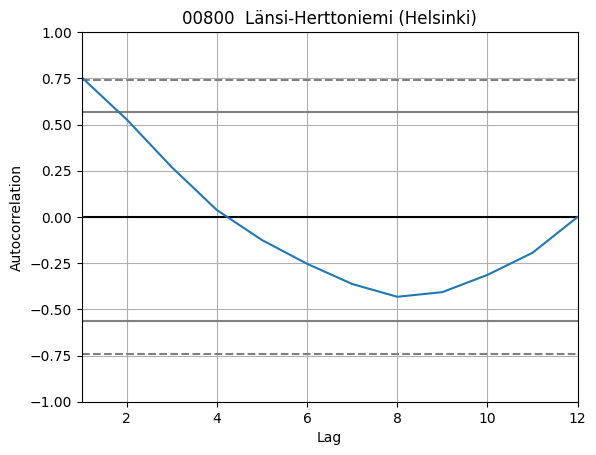

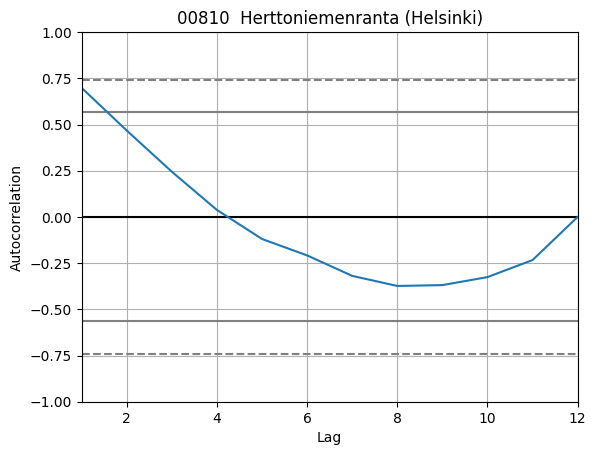

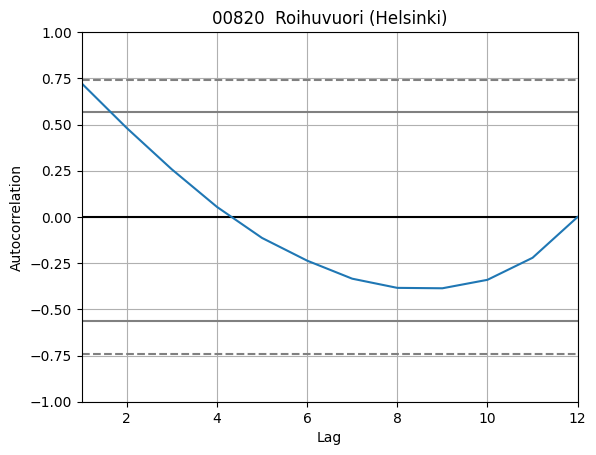

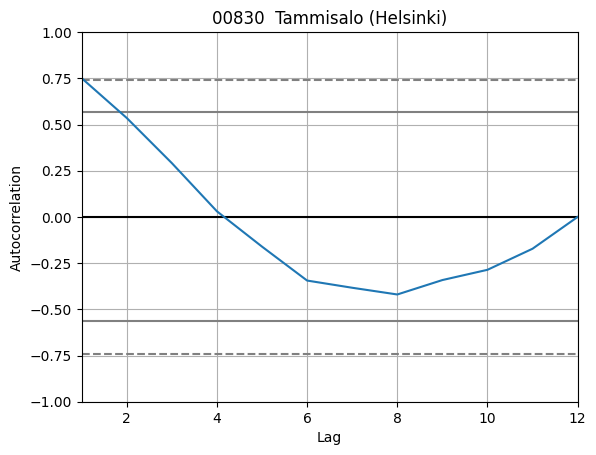

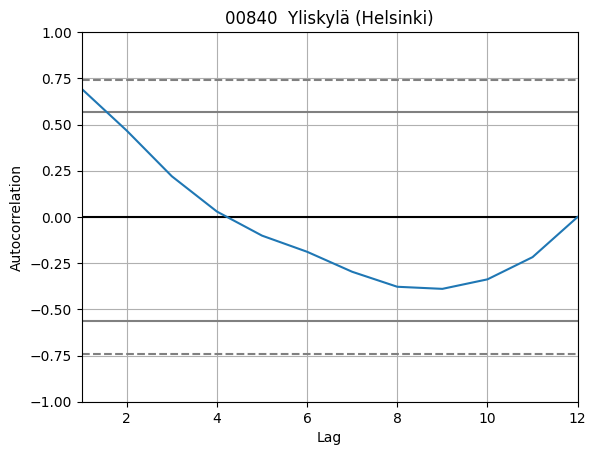

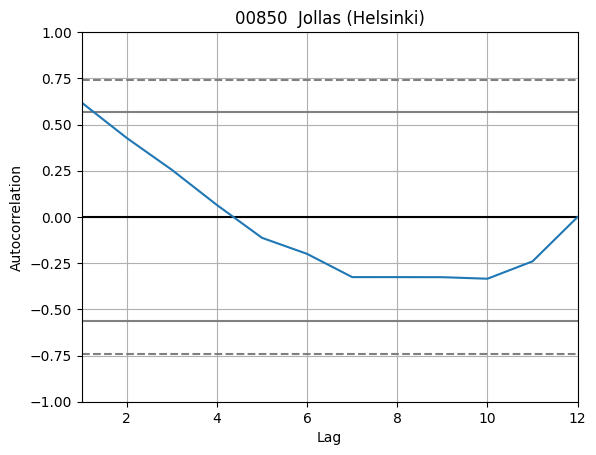

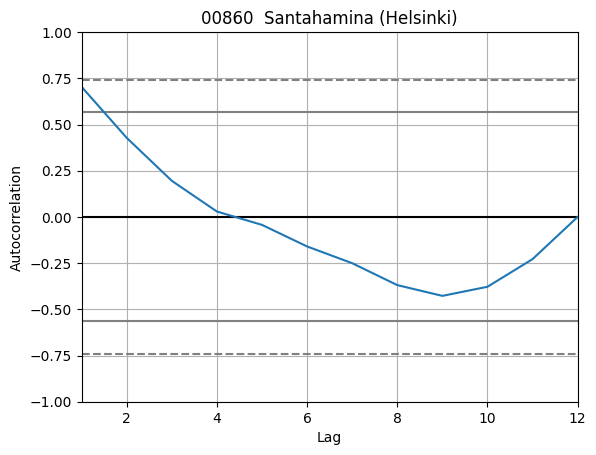

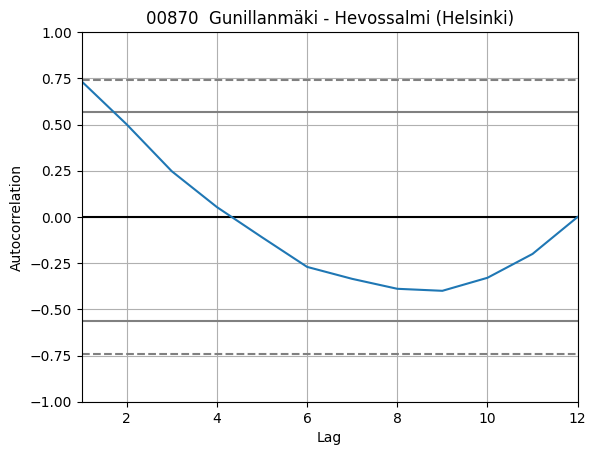

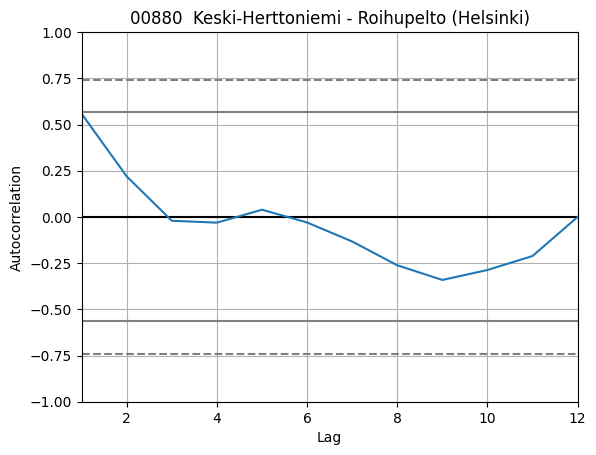

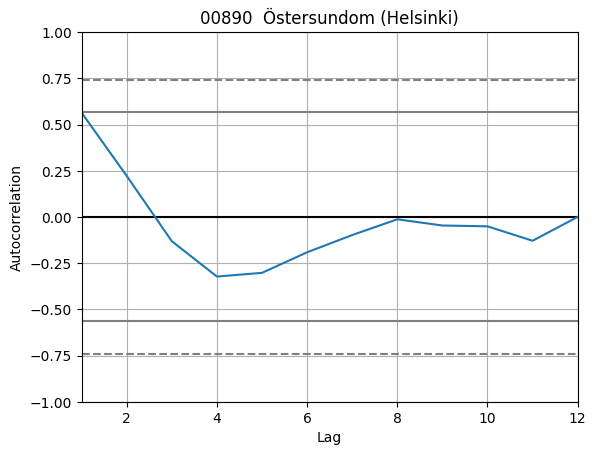

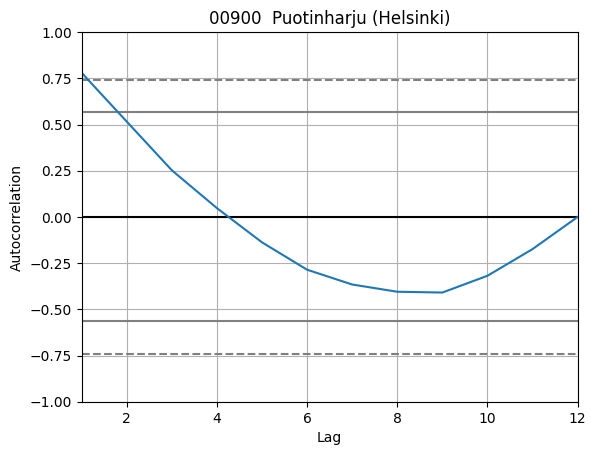

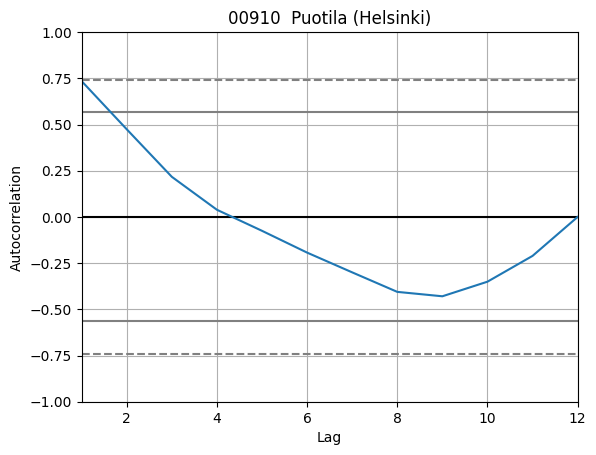

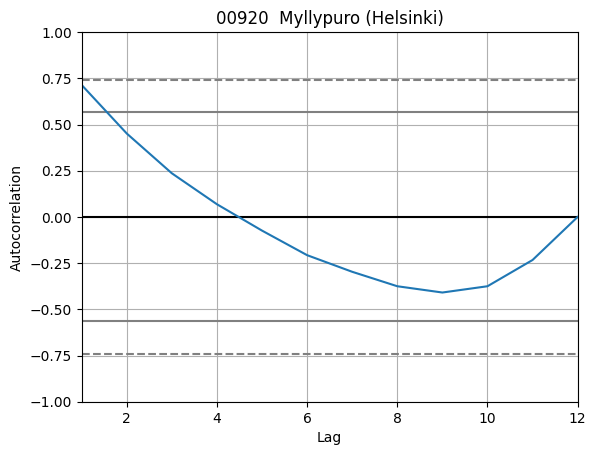

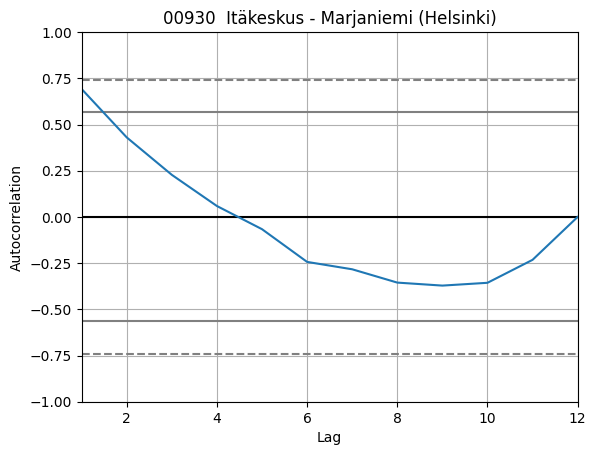

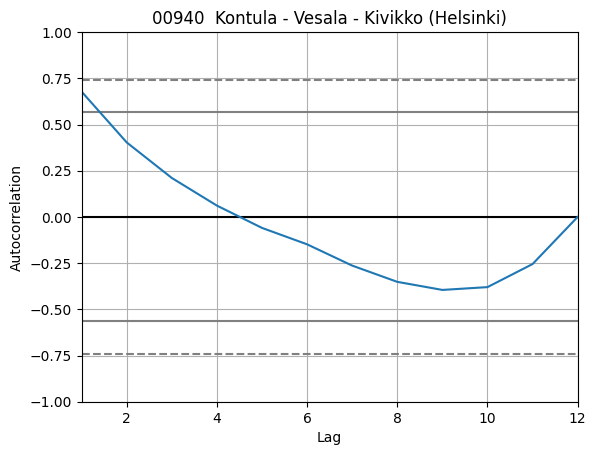

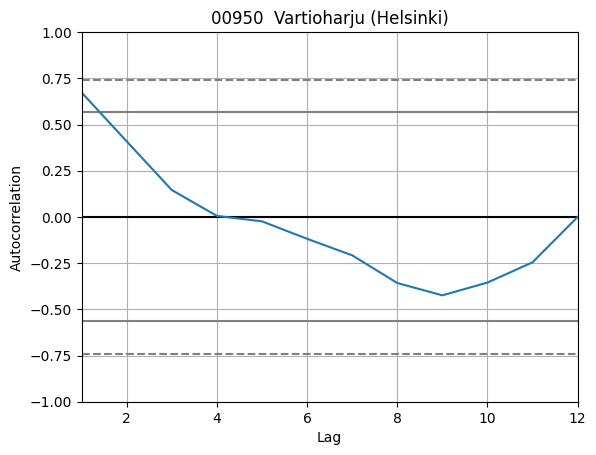

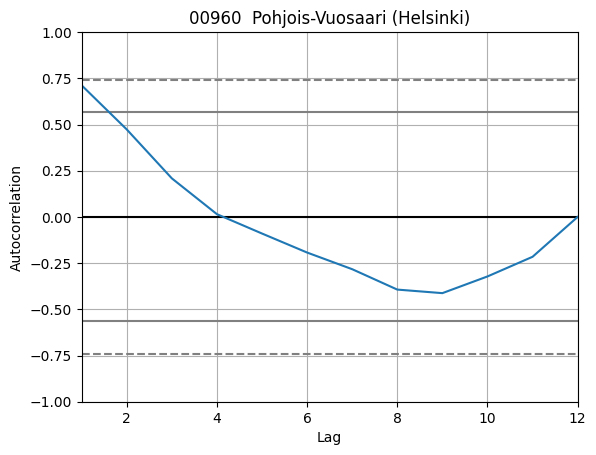

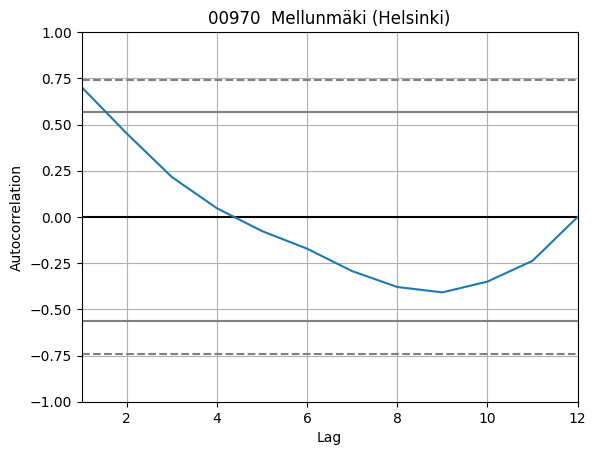

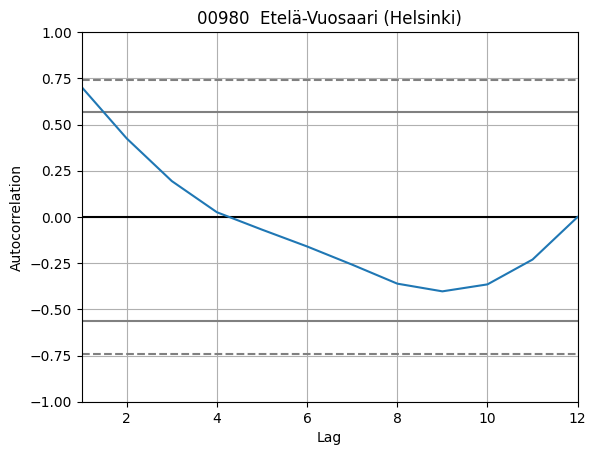

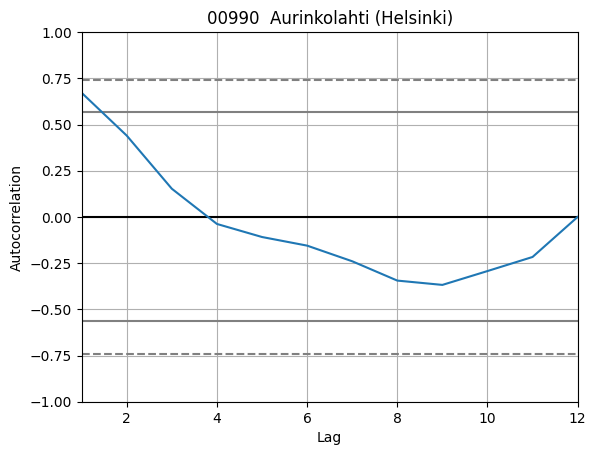

In [5]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller

if DO_CORRELATION_PLOTS:
  plotdata = incomes.drop('Name', axis = 1)
  for r in range(0, incomes.shape[0]):
    postal_code = incomes.iloc[[r]]['Postal code'].values[0]
    name = incomes.iloc[[r]]['Name'].values[0]
    ax = autocorrelation_plot(plotdata.iloc[[r]].T.iloc[1:])

    plt.title(f'{postal_code} {name}')
    plt.show()

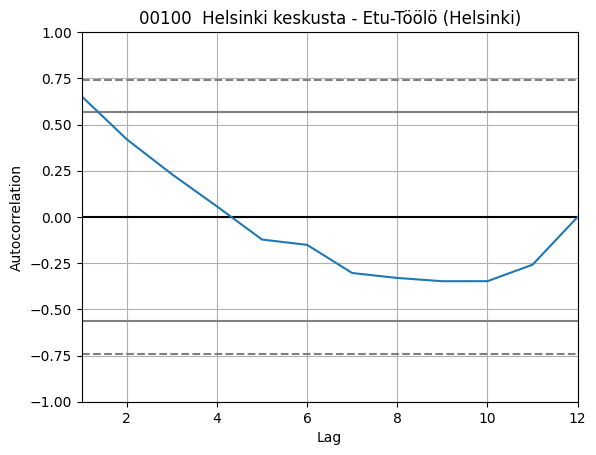

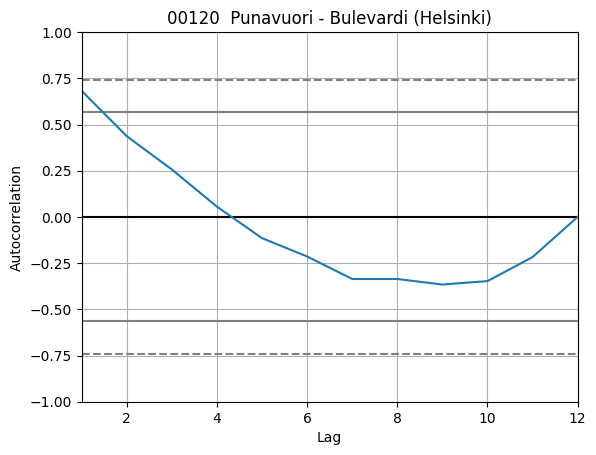

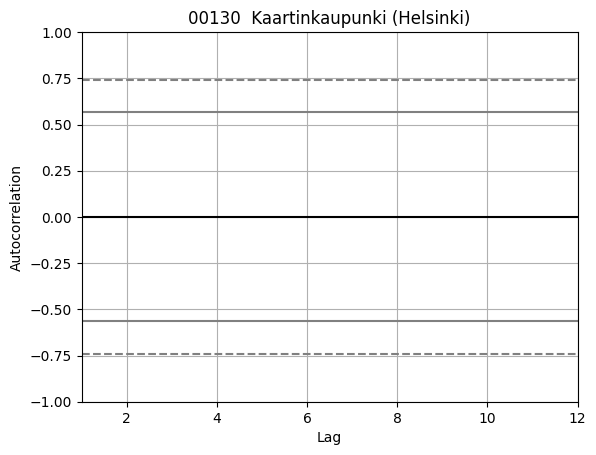

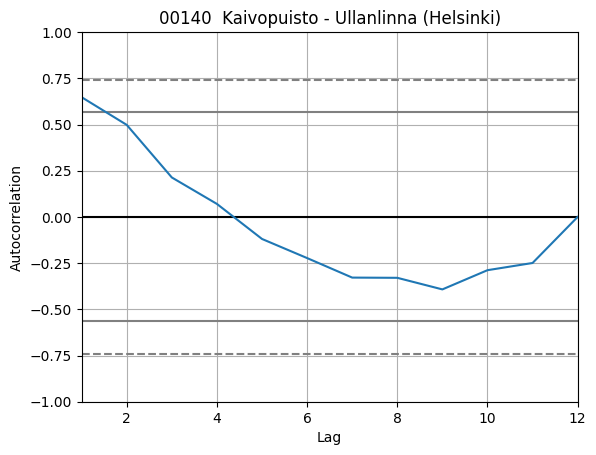

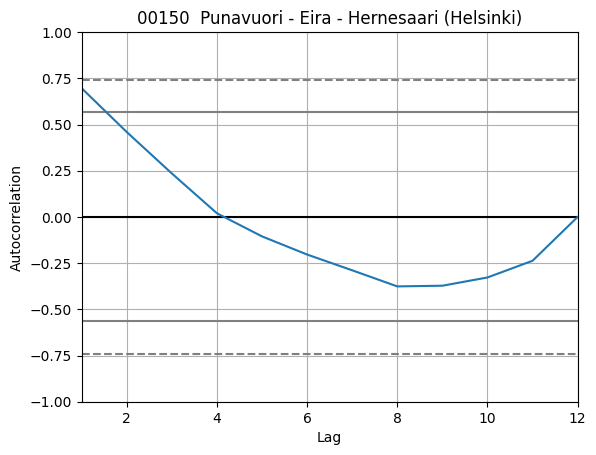

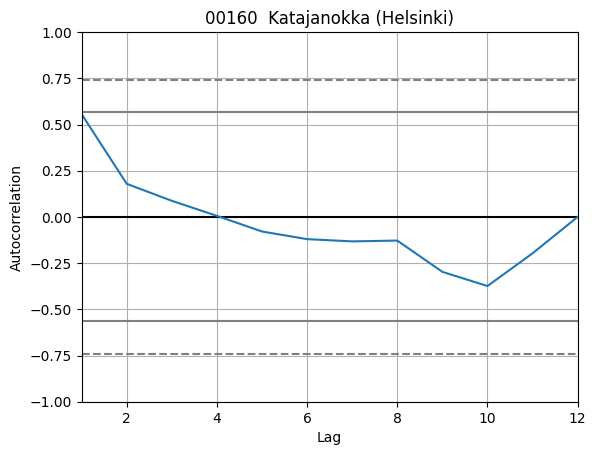

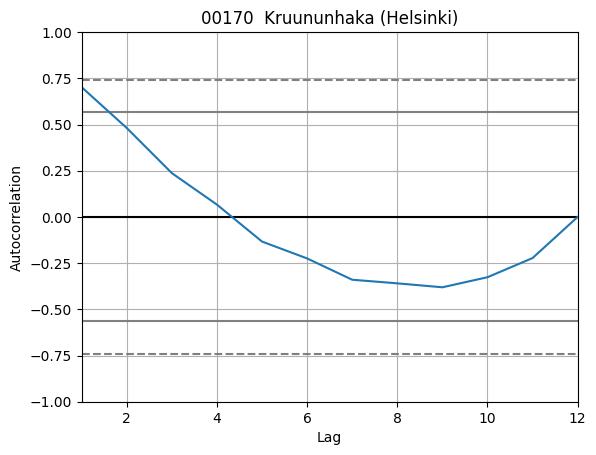

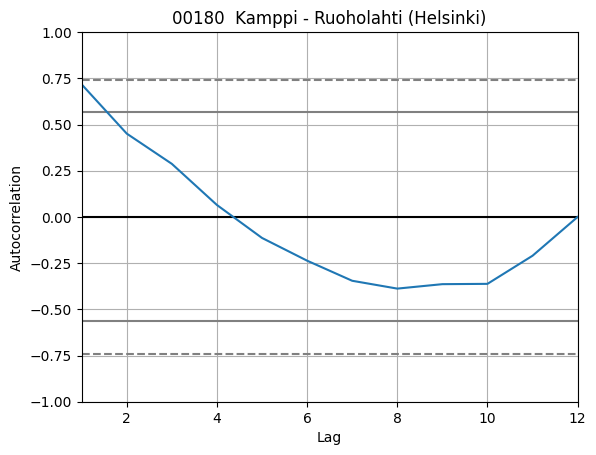

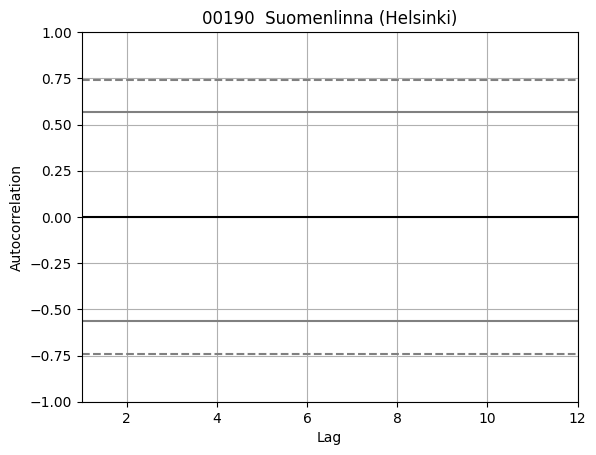

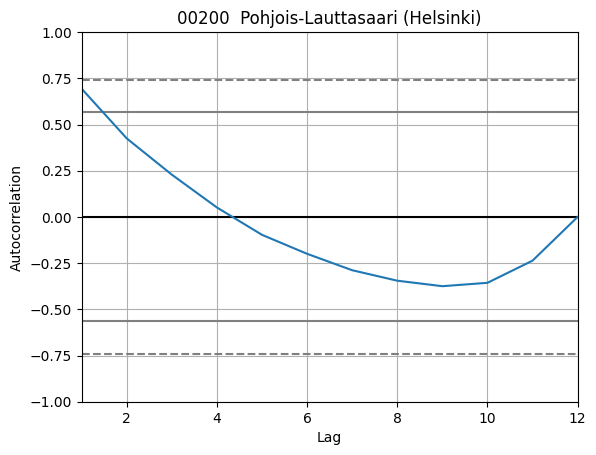

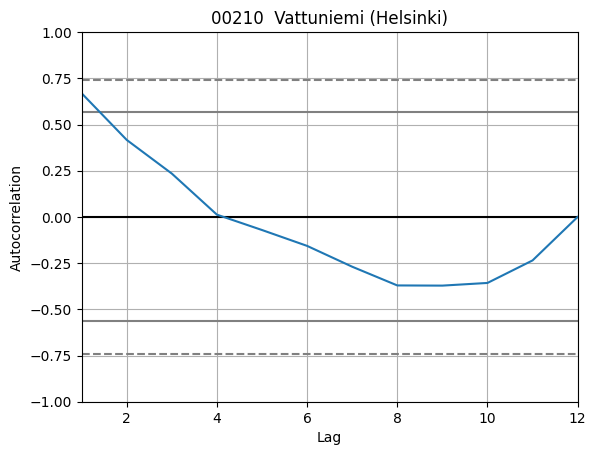

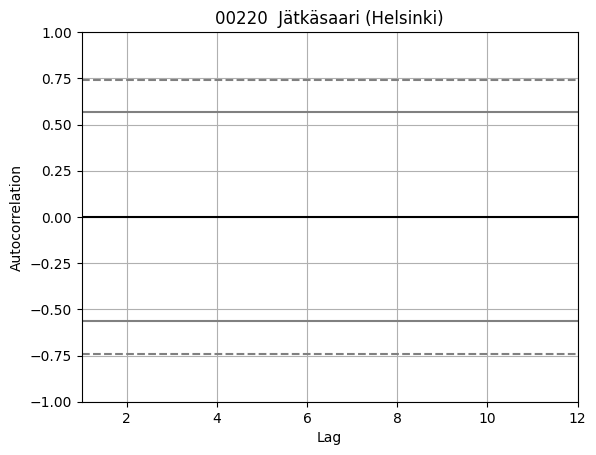

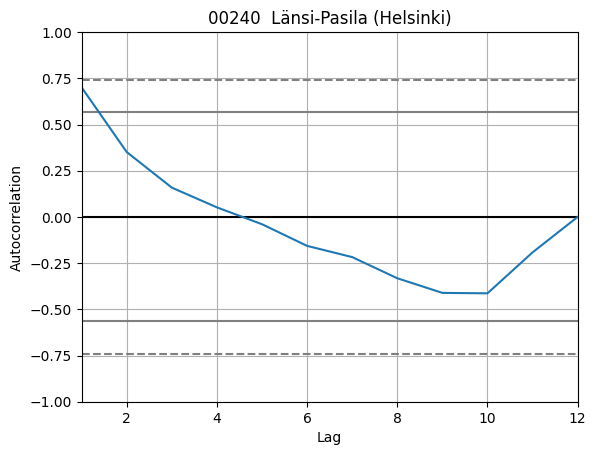

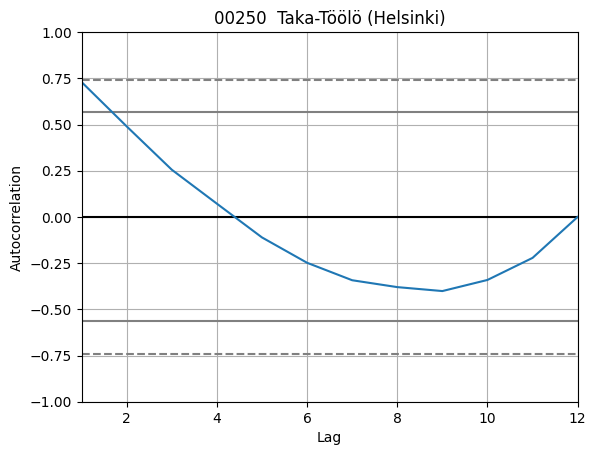

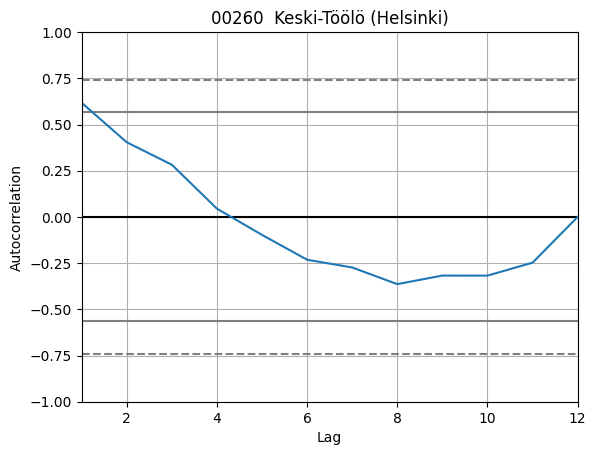

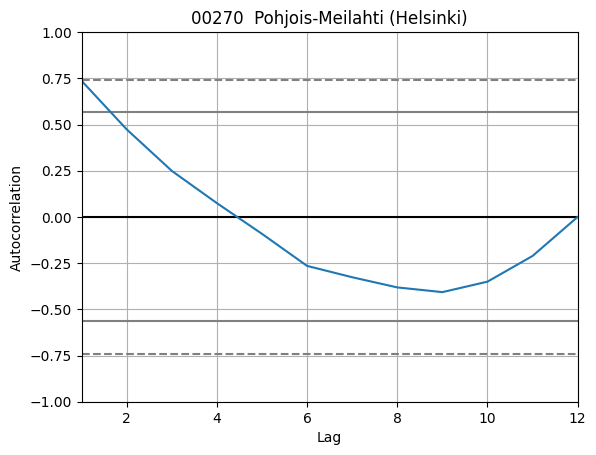

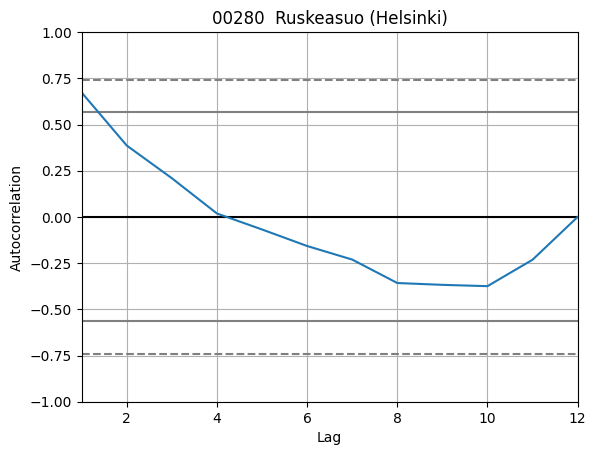

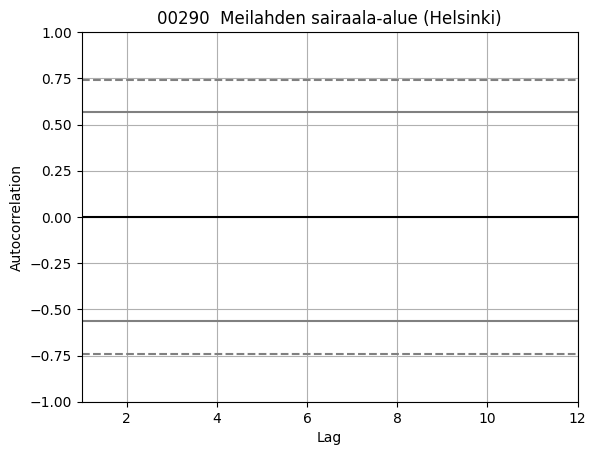

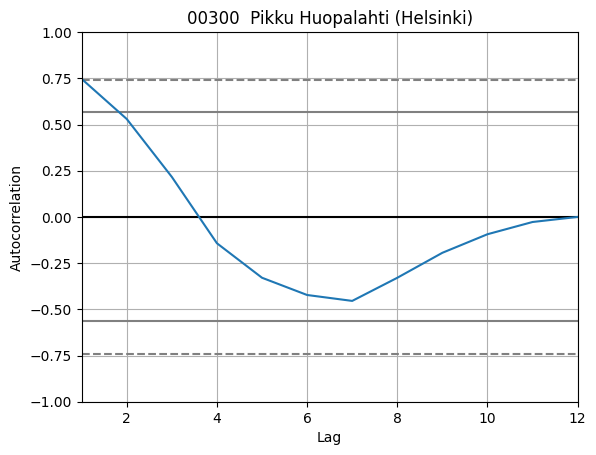

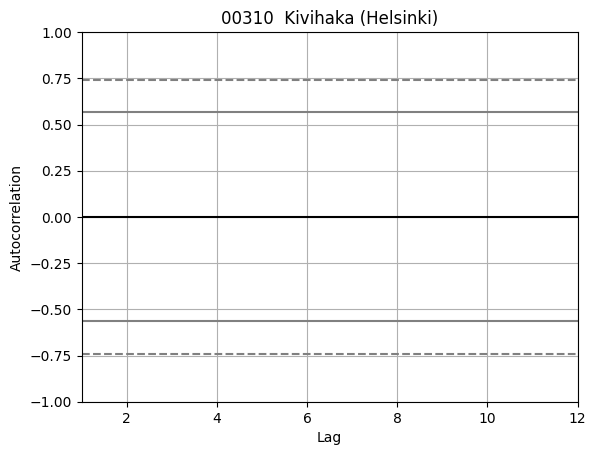

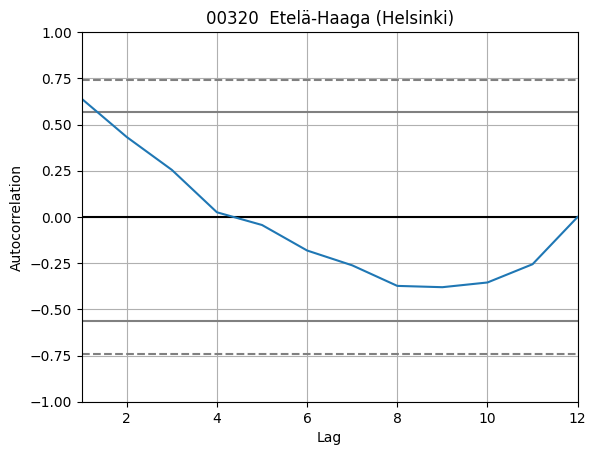

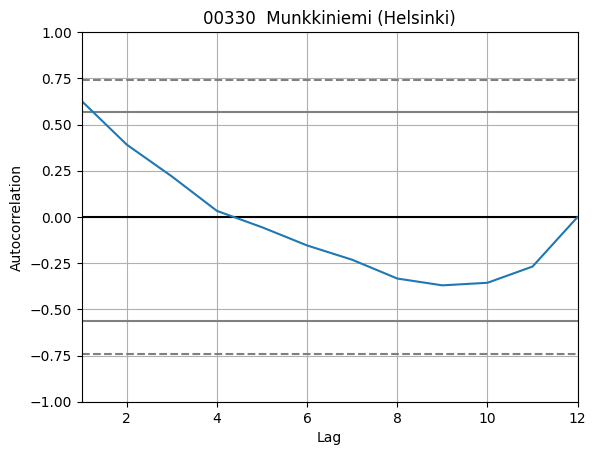

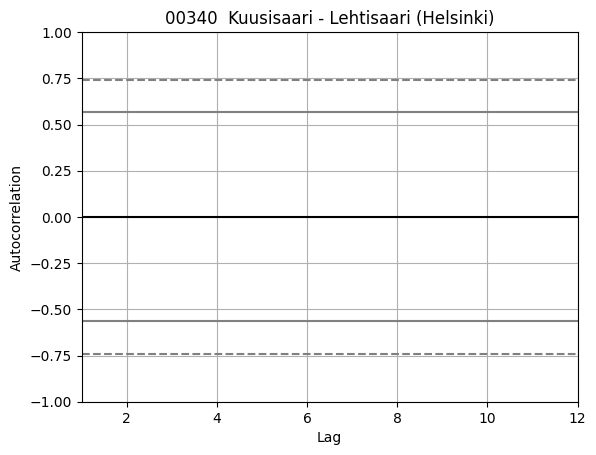

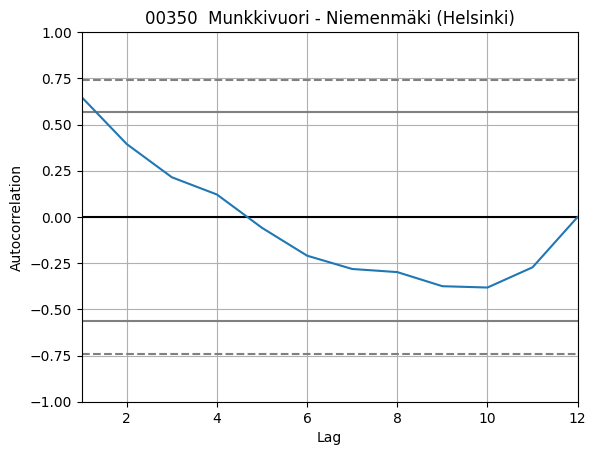

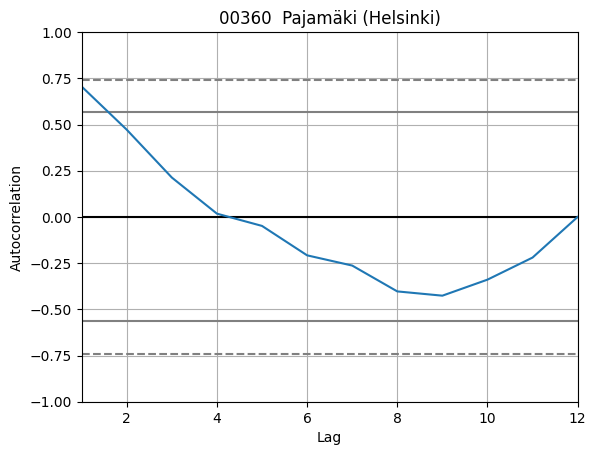

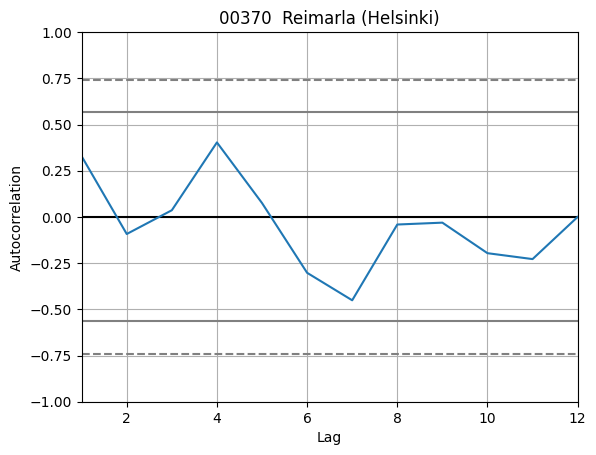

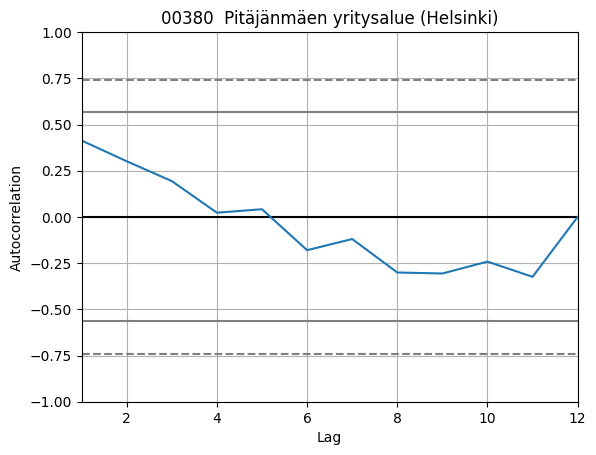

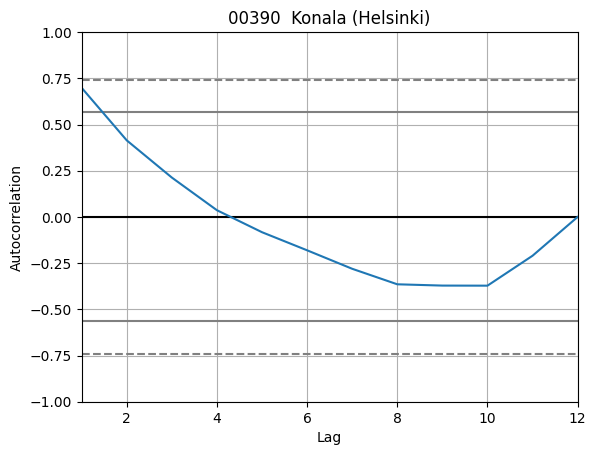

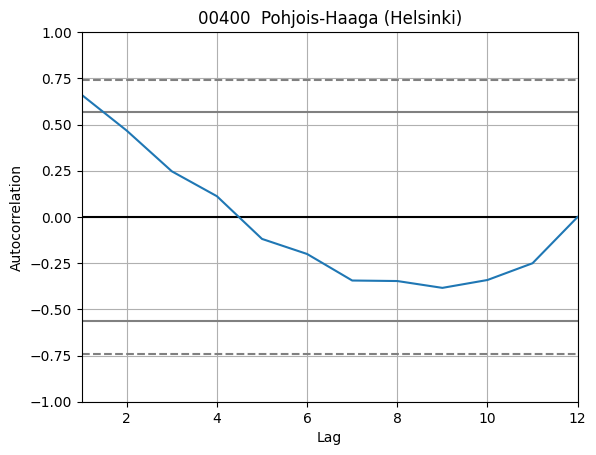

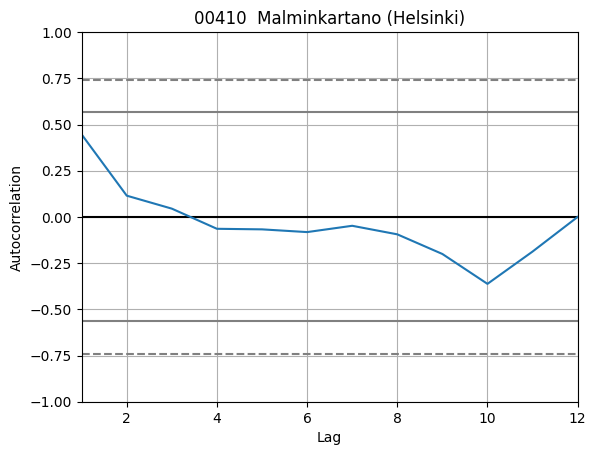

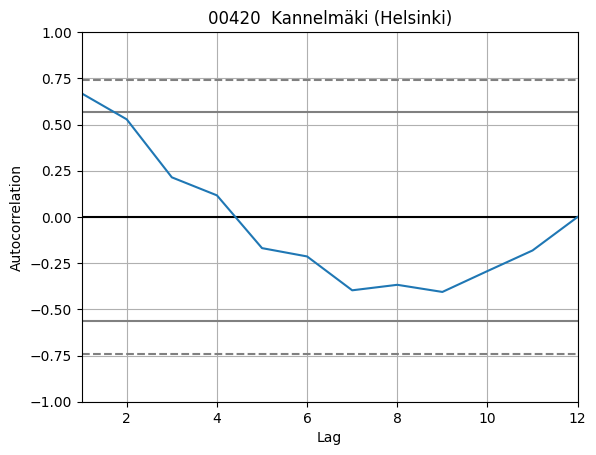

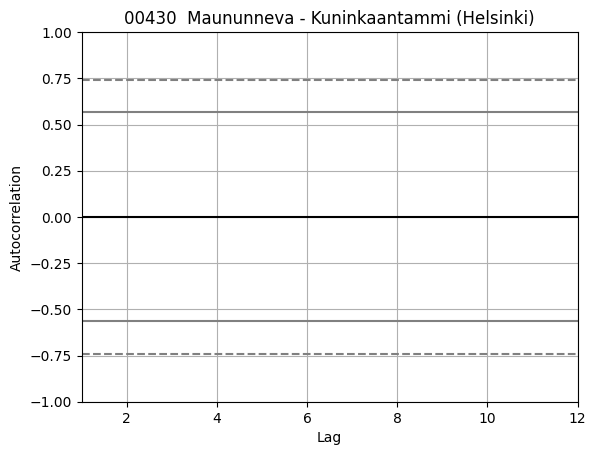

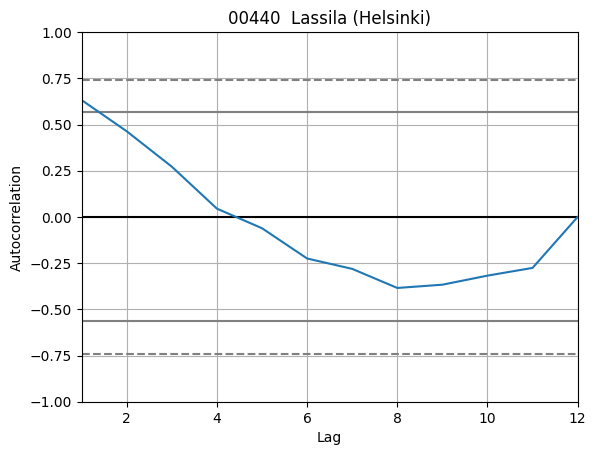

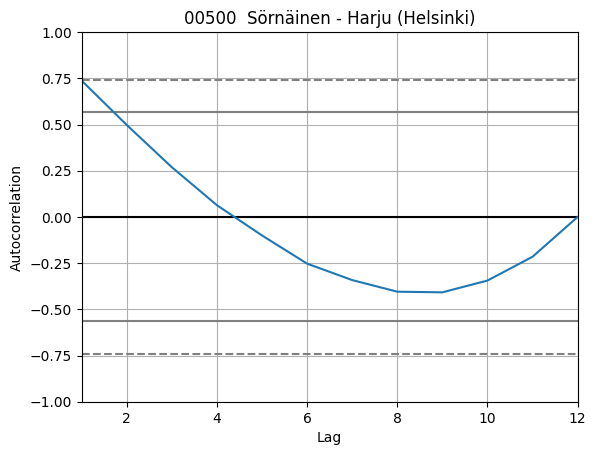

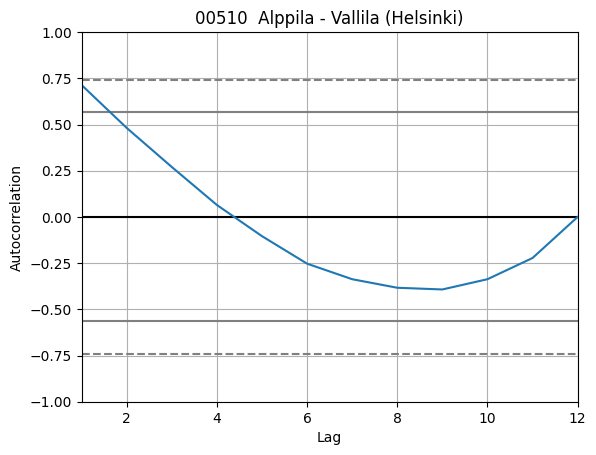

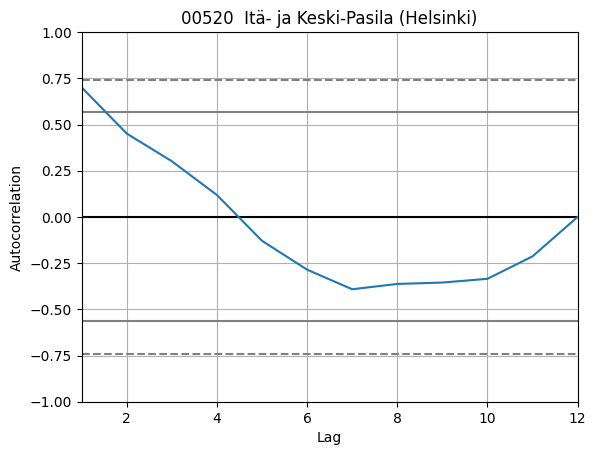

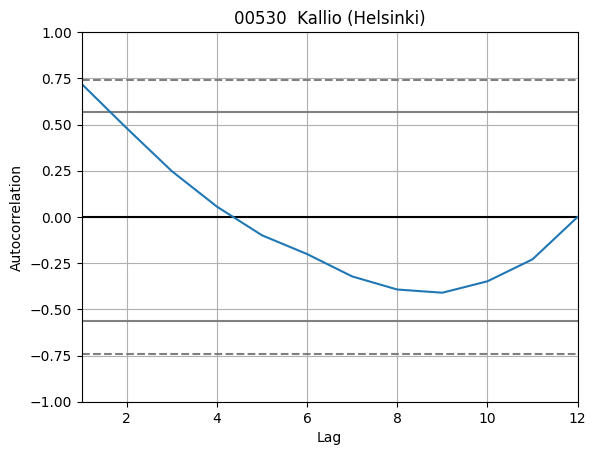

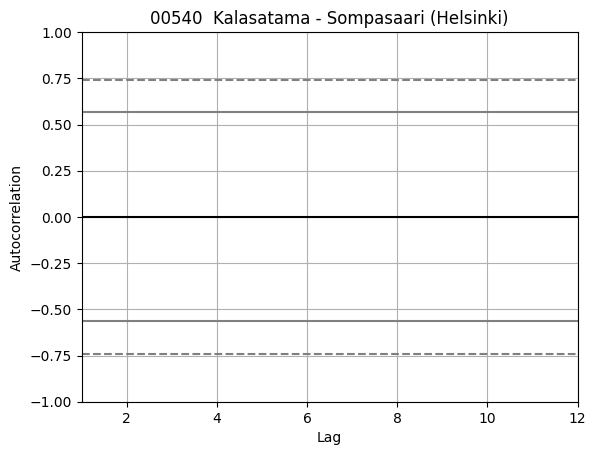

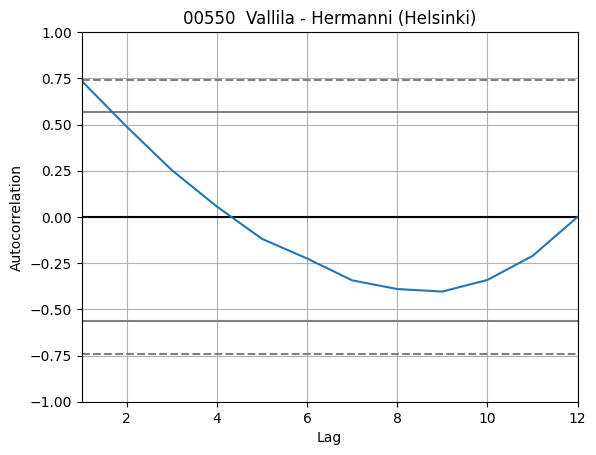

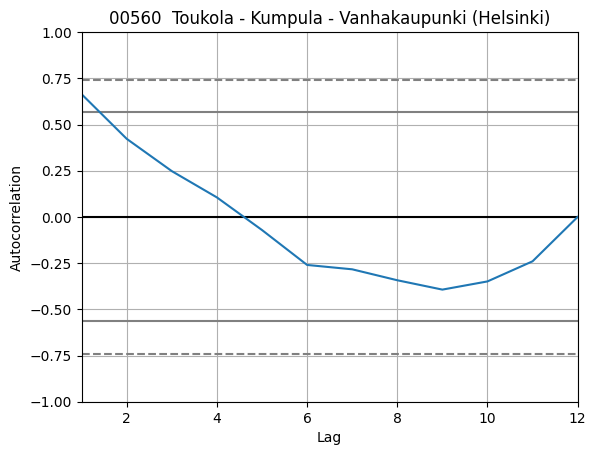

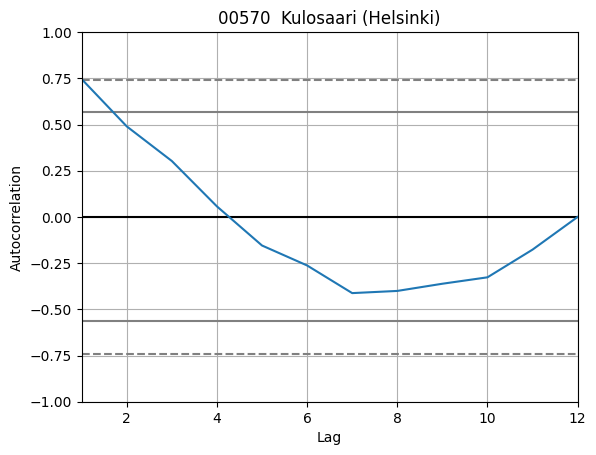

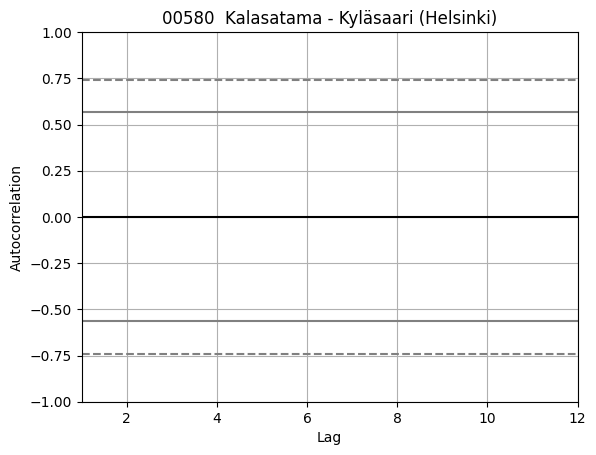

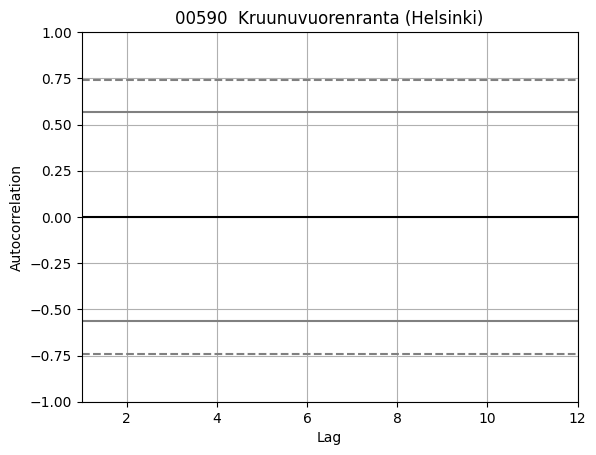

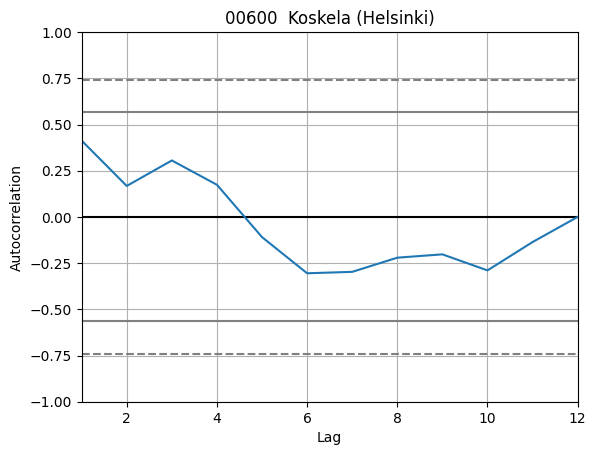

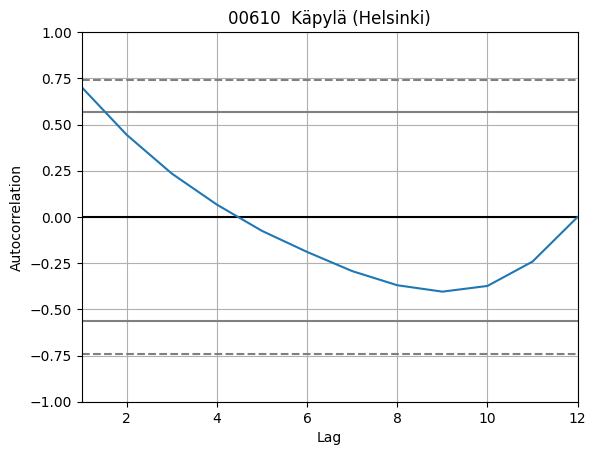

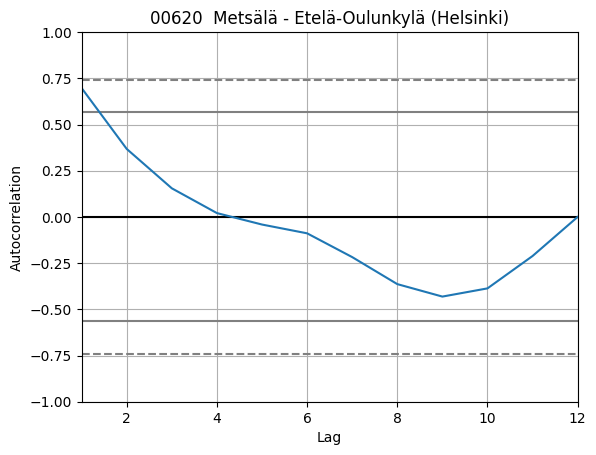

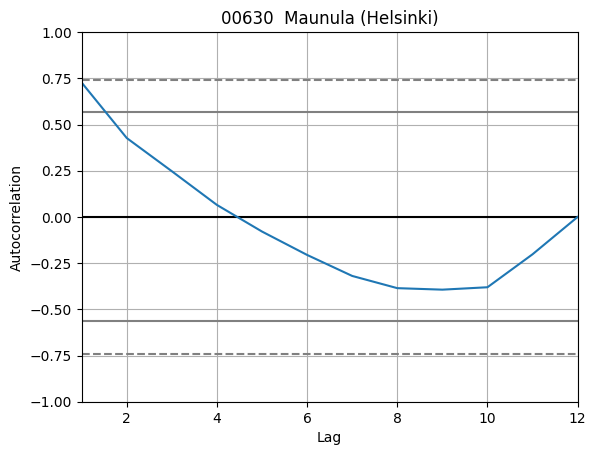

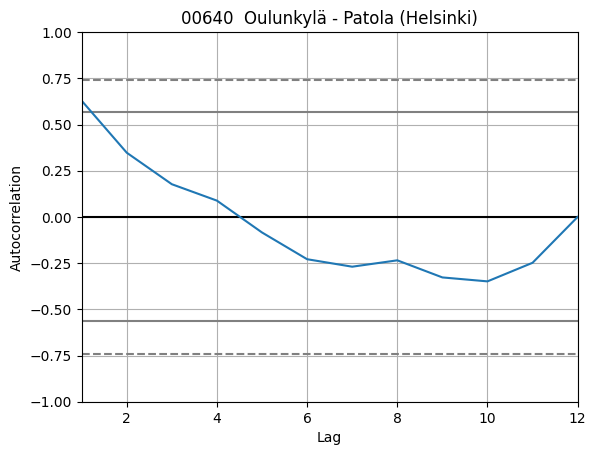

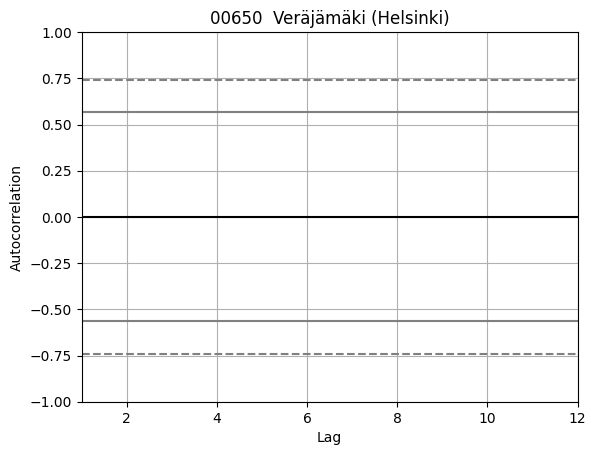

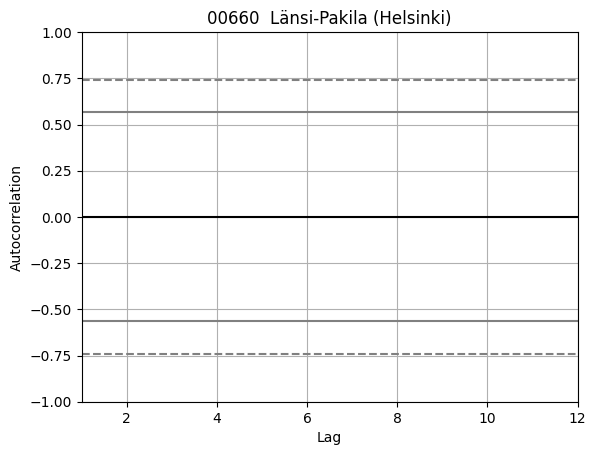

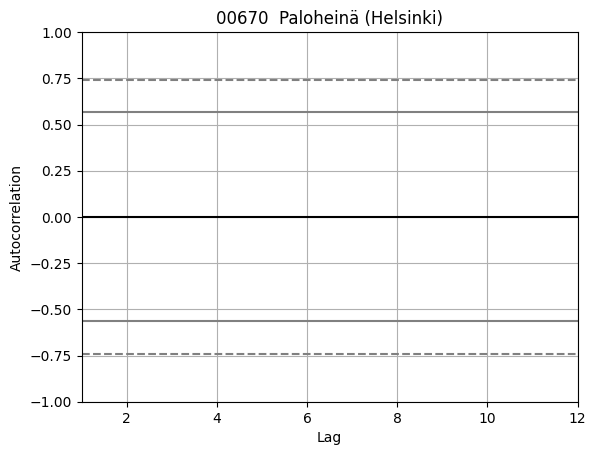

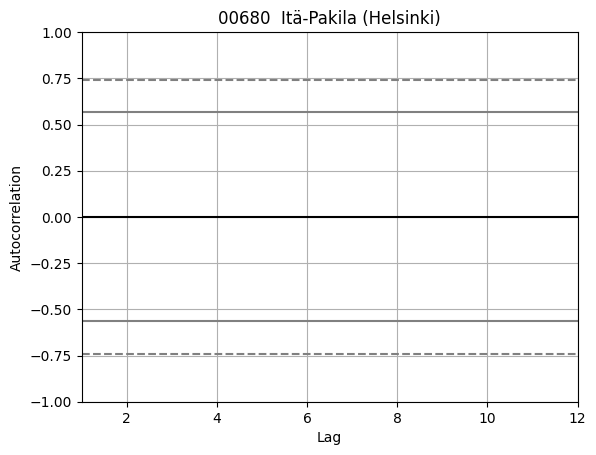

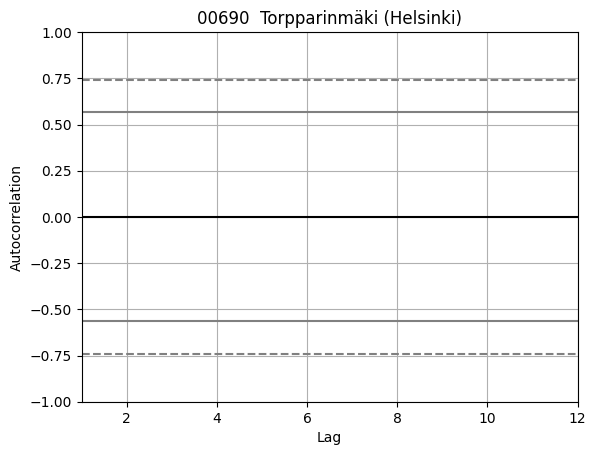

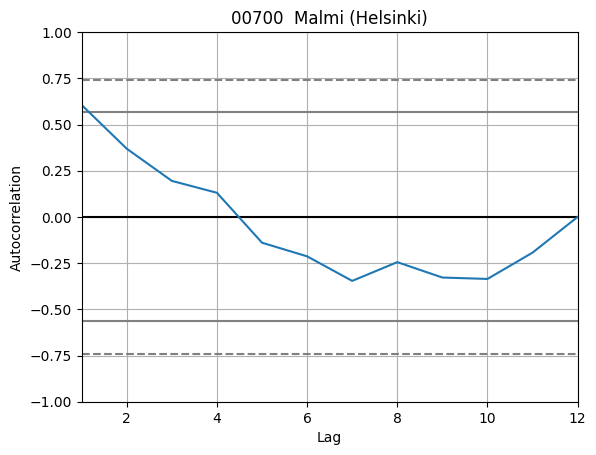

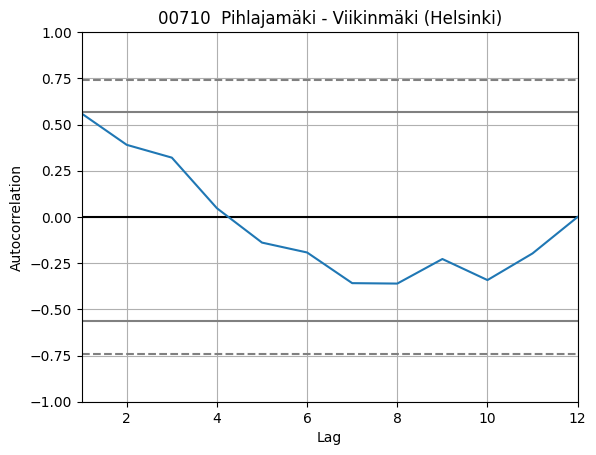

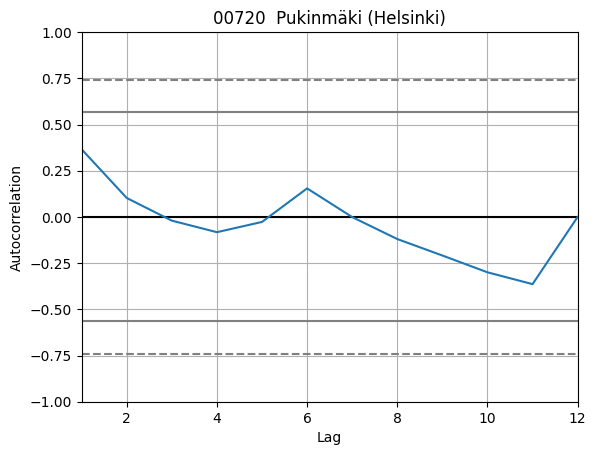

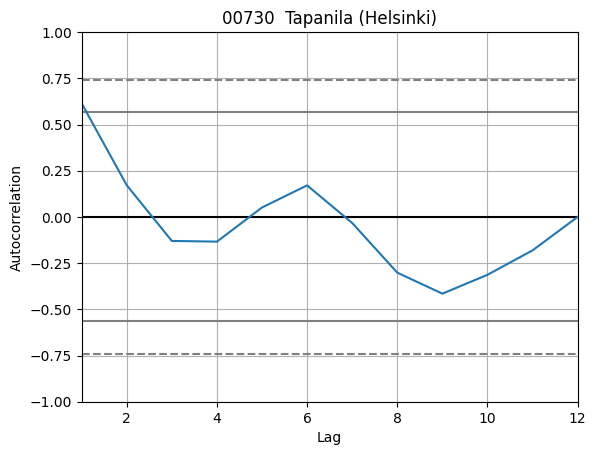

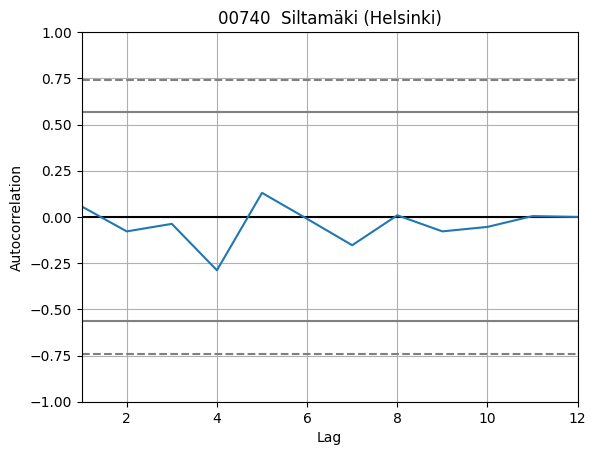

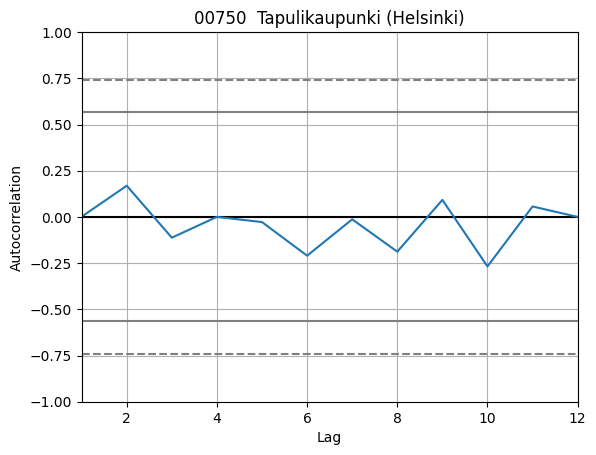

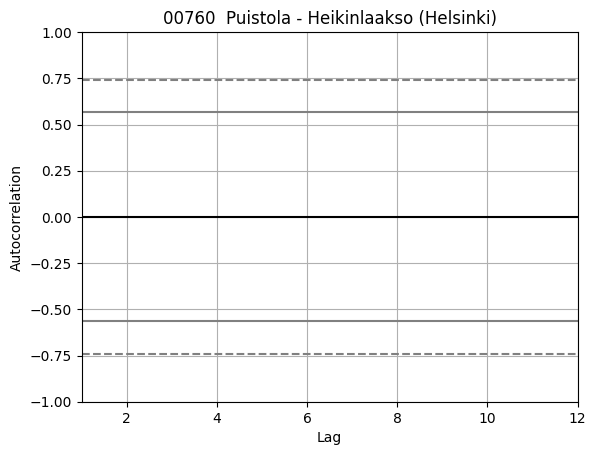

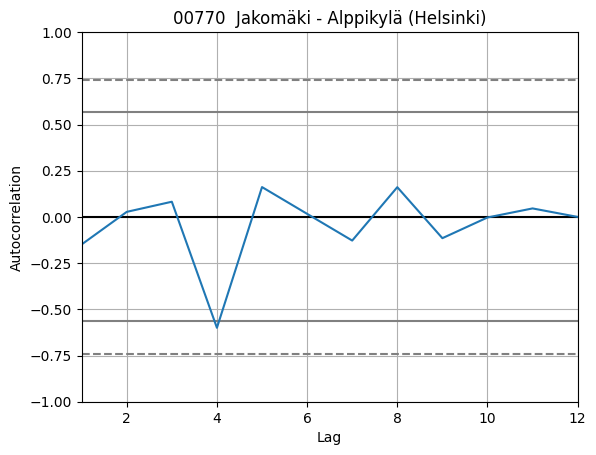

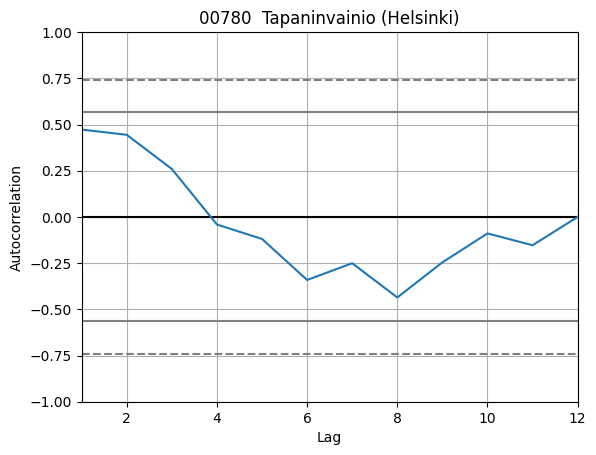

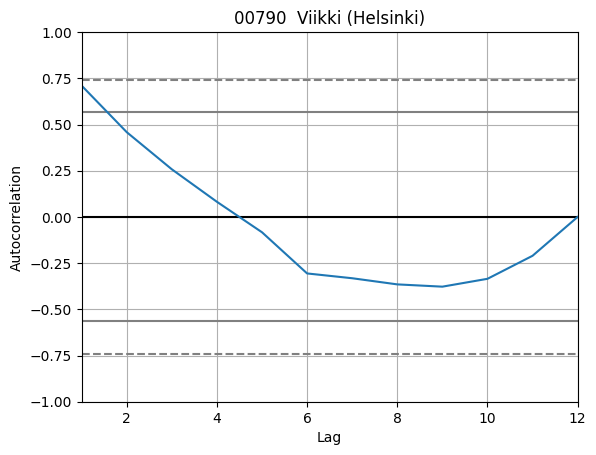

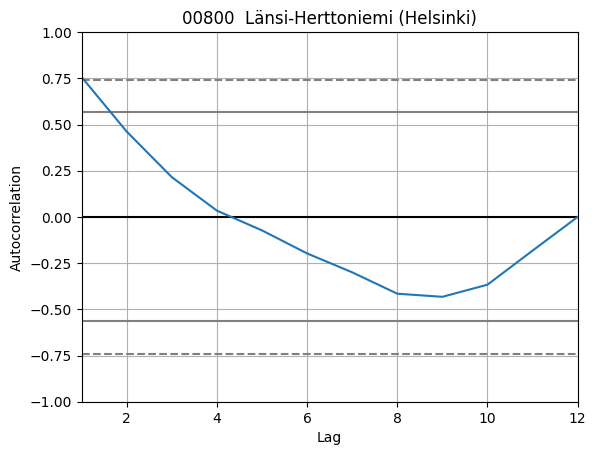

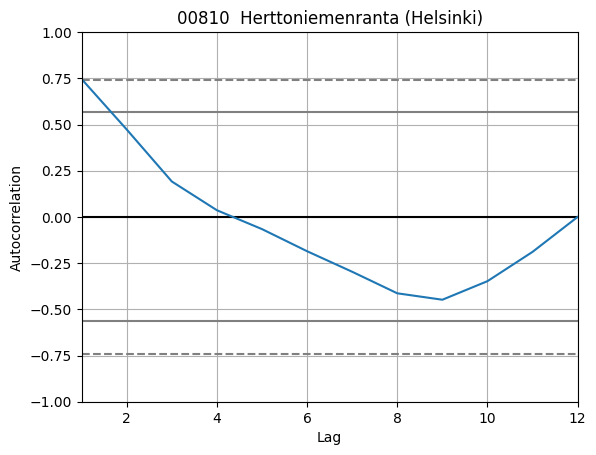

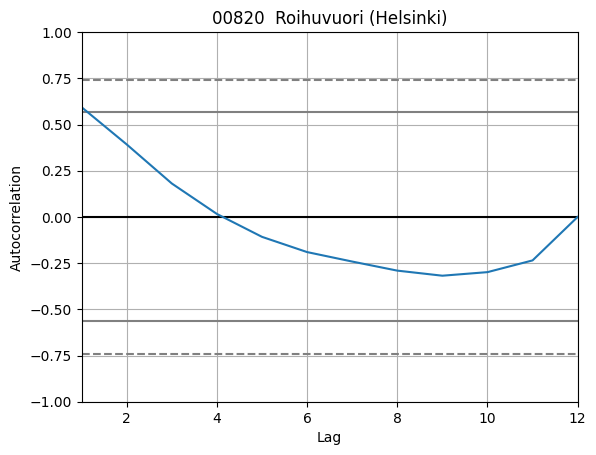

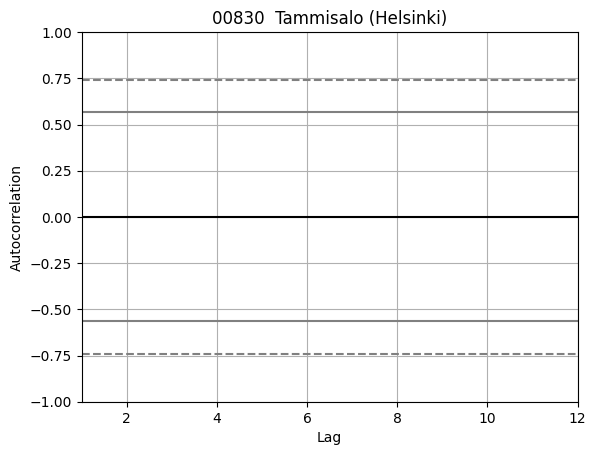

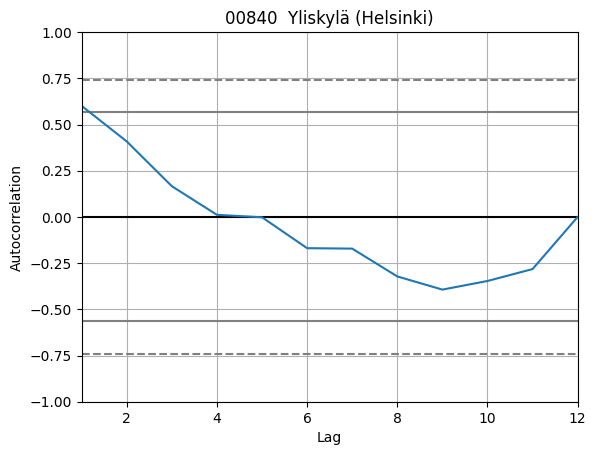

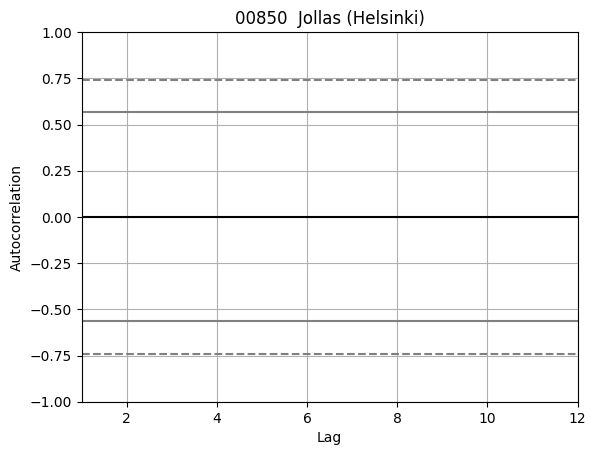

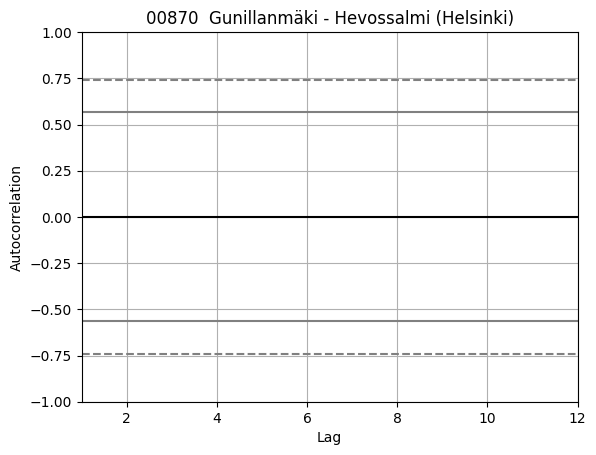

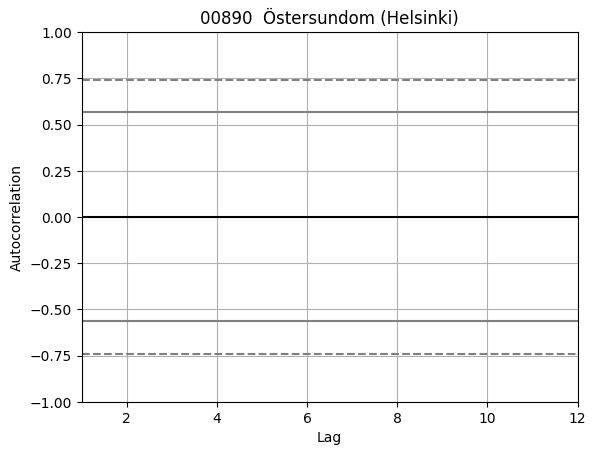

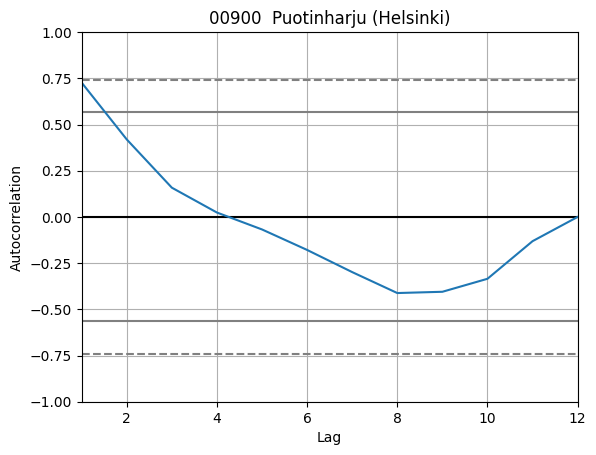

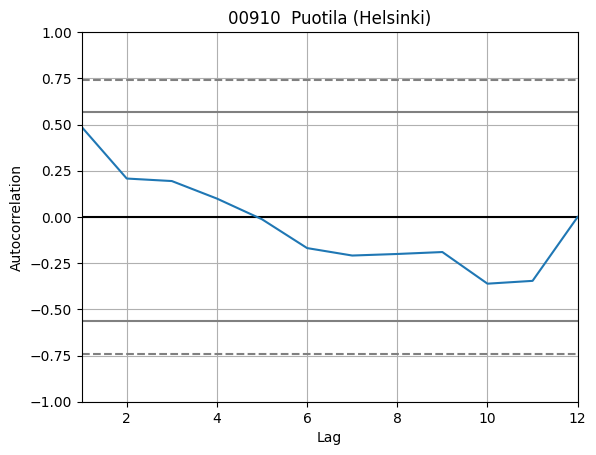

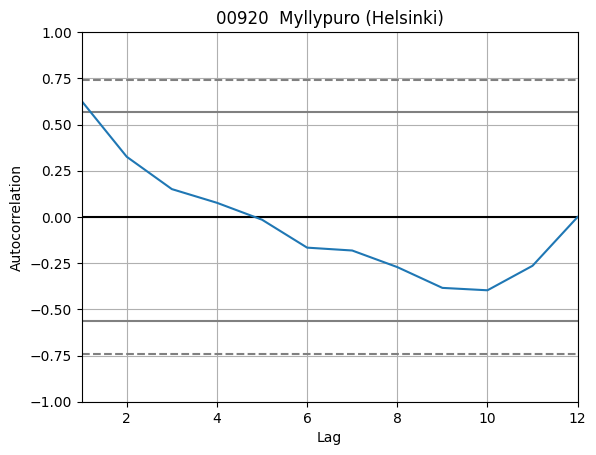

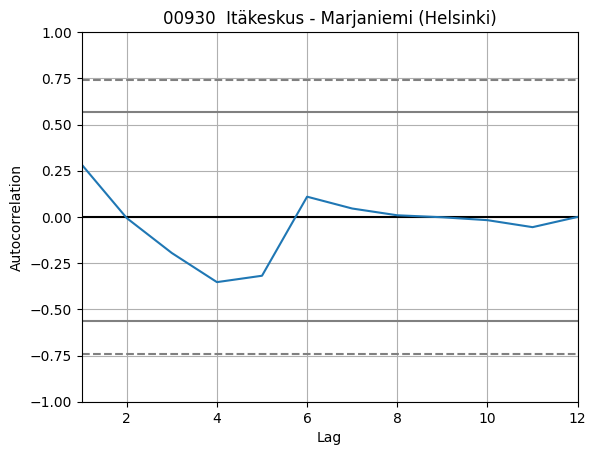

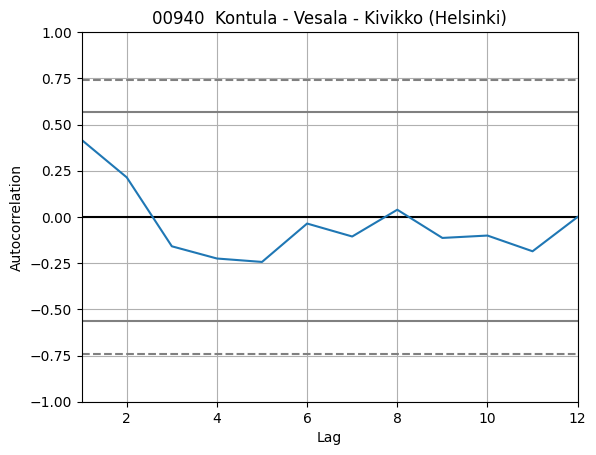

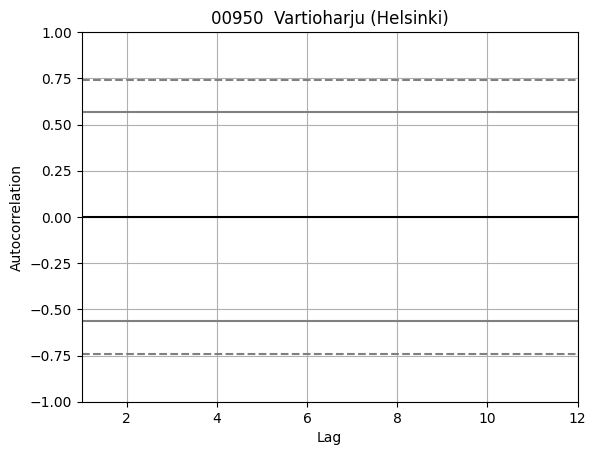

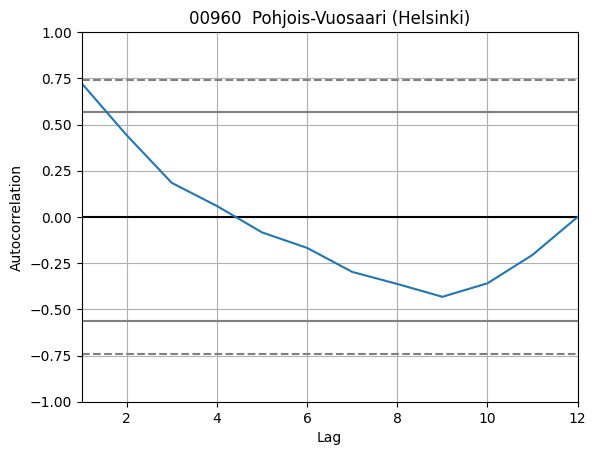

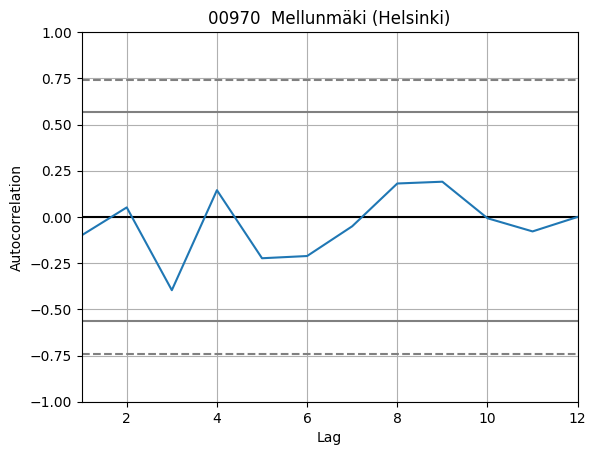

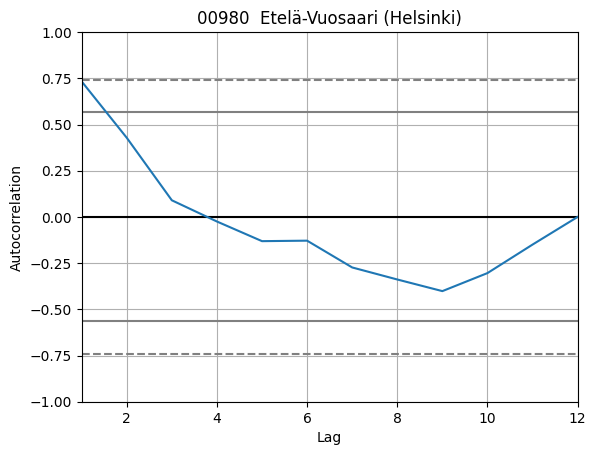

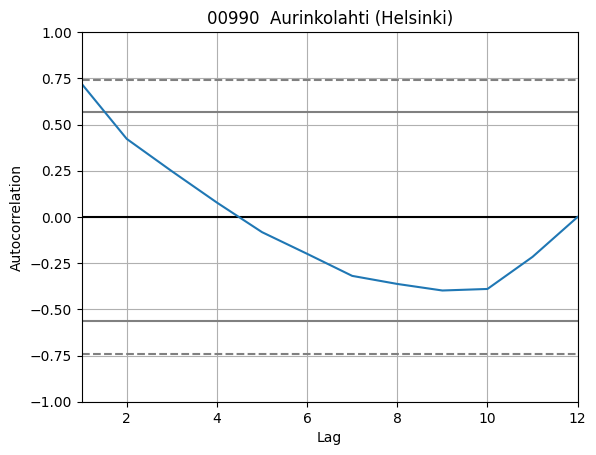

In [6]:
if DO_CORRELATION_PLOTS:
  plotdata = prices.drop('Name', axis = 1)
  for r in range(0, prices.shape[0]):
    postal_code = prices.iloc[[r]]['Postal code'].values[0]
    name = prices.iloc[[r]]['Name'].values[0]
    ax = autocorrelation_plot(plotdata.iloc[[r]].T.iloc[1:])

    plt.title(f'{postal_code} {name}')
    plt.show()

    # h = plotdata.iloc[[r]].T.iloc[1:].dropna()
    # r0 = adfuller(h)
    # r1 = adfuller(h.diff().dropna())
    # r2 = adfuller(h.diff().diff().dropna())

    # print(f'P-values for 0-, 1-, and 2-diffencing: {r0[0]}, {r1[0]}, {r2[0]}')

/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                   12
Model:                 ARIMA(3, 2, 4)   Log Likelihood                 -31.483
Date:                Mon, 02 Oct 2023   AIC                             78.965
Time:                        10:11:41   BIC                             75.841
Sample:                    01-01-2010   HQIC                            70.580
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.5757      0.514     -5.012      0.000      -3.583      -1.569
ar.L2         -2.0980      2.797     -0.750      0.453      -7.579       3.383
ar.L3         -0.6969      2.129     -0.327      0.7

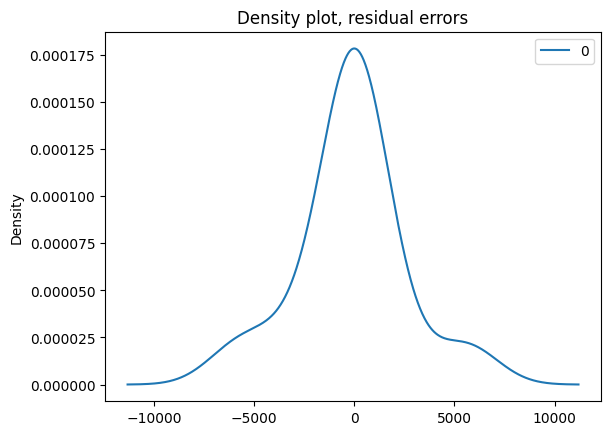

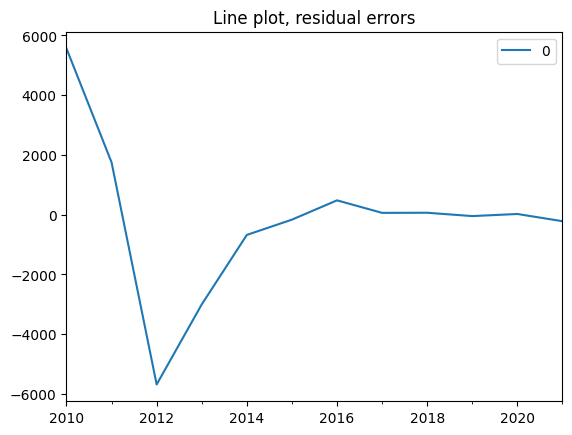

In [7]:
from pandas.tseries.frequencies import to_offset
from statsmodels.tsa.arima.model import ARIMA

# Some exploratory modelling from a single entry.
history = prices.drop(['Name', 'Postal code'], axis = 1).rename({ 3: 'Price' }).iloc[[3]].T
history.index = pd.date_range(freq = 'AS-JAN',
                              periods = len(history.index),
                              start = history.index[0])

# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html
model = ARIMA(history, enforce_stationarity = False, order = (3, 2, 4))
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.fit.html
fitted_model = model.fit()

print(fitted_model.summary())

residuals = pd.DataFrame(fitted_model.resid)
print(residuals.describe())

_ = residuals.plot(kind='kde')
_ = _.set_title('Density plot, residual errors')
_ = residuals.plot()
_ = _.set_title('Line plot, residual errors')

prediction = fitted_model.forecast()
print(f'''
Prediction is {prediction.values[0]} from:

{history}
      ''')

Now, how are we going to find _suitable_ P, Q, and D for every postal code area
for predictions? Just using the same P, Q, and D every time is not going to work
because correlations differ quite wildly (c.f. autocorrelation graphs above).

In the next code cell there are some printouts which can give a good idea just
how bad some predictions are even when some are somewhere in the right ball park
with given P, Q, and D values.

Some background:

https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/

In [8]:
future_incomes = []
for r in range(0, incomes.shape[0]):
  print(incomes.iloc[[r]]['Name'].values[0])
  history = incomes.drop(['Name', 'Postal code'], axis = 1).rename({ 3: 'Income' }).iloc[[r]].T
  history.index = pd.date_range(freq = 'AS-JAN',
                                periods = len(history.index),
                                start = history.index[0])
  model = ARIMA(history, enforce_stationarity = False, order = (1, 2, 3))
  fitted_model = model.fit()
  prediction = fitted_model.forecast().values[0]

  print(f'    {prediction}')
  future_incomes.append(prediction)

future_prices = []
for r in range(0, prices.shape[0]):
  print(prices.iloc[[r]]['Name'].values[0])
  history = prices.drop(['Name', 'Postal code'], axis = 1).rename({ 3: 'Price' }).iloc[[r]].T
  history.index = pd.date_range(freq = 'AS-JAN',
                                periods = len(history.index),
                                start = history.index[0])
  model = ARIMA(history, enforce_stationarity = False, order = (1, 2, 3))
  fitted_model = model.fit()
  prediction = fitted_model.forecast().values[0]

  print(f'    {prediction}')
  future_prices.append(prediction)

 Helsinki keskusta - Etu-Töölö (Helsinki)
    30894.795500708628
 Punavuori - Bulevardi (Helsinki)
    31580.66298775041
 Kaartinkaupunki (Helsinki)
    33165.11605475124
 Kaivopuisto - Ullanlinna (Helsinki)
    30956.6272819266
 Punavuori - Eira - Hernesaari (Helsinki)
    29525.00002061215
 Katajanokka (Helsinki)
    30664.624239289453
 Kruununhaka (Helsinki)
    31906.22668461862
 Kamppi - Ruoholahti (Helsinki)
    27983.377010922883
 Suomenlinna (Helsinki)
    29455.30634315763
 Pohjois-Lauttasaari (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

    31082.52172896108
 Vattuniemi (Helsinki)
    35120.3951995391
 Jätkäsaari (Helsinki)
    28700.004700294154
 Helsinki postikeskus (Helsinki)
    0.0
 Länsi-Pasila (Helsinki)
    26850.3258175646
 Taka-Töölö (Helsinki)
    26899.219081346328
 Keski-Töölö (Helsinki)
    29934.52763904663
 Pohjois-Meilahti (Helsinki)
    27829.15620071873
 Ruskeasuo (Helsinki)
    26495.208354662172
 Meilahden sairaala-alue (Helsinki)
    32786.50706453688
 Pikku Huopalahti (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/sjl/.pyenv/versions/3.11.5/envs/ge

    26417.077413499002
 Kivihaka (Helsinki)
    25928.365319422137
 Etelä-Haaga (Helsinki)
    27472.589430846052
 Munkkiniemi (Helsinki)
    33068.37369522087
 Kuusisaari - Lehtisaari (Helsinki)
    35616.49998752177
 Munkkivuori - Niemenmäki (Helsinki)
    27727.692312298997
 Pajamäki (Helsinki)
    25961.056350448707
 Reimarla (Helsinki)
    26325.54790304331
 Pitäjänmäen yritysalue (Helsinki)
    26600.272925813126
 Konala (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

    25881.886686736834
 Pohjois-Haaga (Helsinki)
    23934.098630814828
 Malminkartano (Helsinki)
    23904.19752545112
 Kannelmäki (Helsinki)
    22870.325878189782
 Maununneva - Kuninkaantammi (Helsinki)
    27973.29210305035
 Lassila (Helsinki)
    22477.098191373585
 Sörnäinen - Harju (Helsinki)
    24075.759036639123
 Alppila - Vallila (Helsinki)
    25401.001629248913
 Itä- ja Keski-Pasila (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

    27728.94045679712
 Kallio (Helsinki)
    24214.366020489095
 Kalasatama - Sompasaari (Helsinki)
    31968.02559042938
 Vallila - Hermanni (Helsinki)
    24493.607561781497
 Toukola - Kumpula - Vanhakaupunki (Helsinki)
    26971.468440875946
 Kulosaari (Helsinki)
    32985.02346513475
 Kalasatama - Kyläsaari (Helsinki)
    28488.380162305304
 Kruunuvuorenranta (Helsinki)
    28242.149849389178
 Koskela (Helsinki)
    23256.023530484606
 Käpylä (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

    27582.71424545556
 Metsälä - Etelä-Oulunkylä (Helsinki)
    28877.534667026277
 Maunula (Helsinki)
    24757.47370814522
 Oulunkylä - Patola (Helsinki)
    27565.052382281905
 Veräjämäki (Helsinki)
    28039.0677731623
 Länsi-Pakila (Helsinki)
    34471.456390479456
 Paloheinä (Helsinki)
    36007.28132516072
 Itä-Pakila (Helsinki)
    33143.62832214619
 Torpparinmäki (Helsinki)
    30893.51518562495
 Malmi (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

    23435.909517098466
 Pihlajamäki - Viikinmäki (Helsinki)
    23401.604980562253
 Pukinmäki (Helsinki)
    24648.10229241636
 Tapanila (Helsinki)
    27962.787605727564
 Siltamäki (Helsinki)
    26036.398367226262
 Tapulikaupunki (Helsinki)
    24413.988756730283
 Puistola - Heikinlaakso (Helsinki)
    28552.854898760113
 Jakomäki - Alppikylä (Helsinki)
    22676.78442799667
 Tapaninvainio (Helsinki)
    28245.745439677376
 Viikki (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

    25120.474755227737
 Länsi-Herttoniemi (Helsinki)
    25665.262370596574
 Herttoniemenranta (Helsinki)
    26753.082178903856
 Roihuvuori (Helsinki)
    24584.171700991265
 Tammisalo (Helsinki)
    36178.43386503757
 Yliskylä (Helsinki)
    28371.265973511458
 Jollas (Helsinki)
    33045.30836353688
 Santahamina (Helsinki)
    33188.57702393749
 Gunillanmäki - Hevossalmi (Helsinki)
    25363.481732947177
 Keski-Herttoniemi - Roihupelto (Helsinki)
    27573.564000417497
 Östersundom (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

    33396.67156996573
 Puotinharju (Helsinki)
    22002.21831889454
 Puotila (Helsinki)
    23239.89727013185
 Myllypuro (Helsinki)
    24961.149052928475
 Itäkeskus - Marjaniemi (Helsinki)
    23429.981038610797
 Kontula - Vesala - Kivikko (Helsinki)
    20816.020153387
 Vartioharju (Helsinki)
    29070.63060446742
 Pohjois-Vuosaari (Helsinki)
    24255.48962197898
 Mellunmäki (Helsinki)
    23311.119771637932
 Etelä-Vuosaari (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

    23107.157450589228
 Aurinkolahti (Helsinki)
    27288.36345621384
 Helsinki keskusta - Etu-Töölö (Helsinki)
    8483.126485673296
 Punavuori - Bulevardi (Helsinki)
    9109.582571803594
 Kaartinkaupunki (Helsinki)
    9605.722518793424
 Kaivopuisto - Ullanlinna (Helsinki)
    9140.791963699521
 Punavuori - Eira - Hernesaari (Helsinki)
    9257.935223347493
 Katajanokka (Helsinki)
    8772.55389812044
 Kruununhaka (Helsinki)
    8429.023474427704
 Kamppi - Ruoholahti (Helsinki)
    8348.725197423259
 Suomenlinna (Helsinki)
    0.0
 Pohjois-Lauttasaari (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

    7272.037903736805
 Vattuniemi (Helsinki)
    7362.698716195456
 Jätkäsaari (Helsinki)
    8775.344430623321
 Länsi-Pasila (Helsinki)
    5806.8578739700515
 Taka-Töölö (Helsinki)
    7412.97022554793
 Keski-Töölö (Helsinki)
    8184.901716819051
 Pohjois-Meilahti (Helsinki)
    7014.511639926501
 Ruskeasuo (Helsinki)
    7373.459182736573
 Meilahden sairaala-alue (Helsinki)
    0.0
 Pikku Huopalahti (Helsinki)
    4858.422986406566
 Kivihaka (Helsinki)
    5308.625677672202
 Etelä-Haaga (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/tsa/stat

    5561.833209202521
 Munkkiniemi (Helsinki)
    7324.284523078906
 Kuusisaari - Lehtisaari (Helsinki)
    4750.326931332699
 Munkkivuori - Niemenmäki (Helsinki)
    5435.749914288723
 Pajamäki (Helsinki)
    4781.428396740809
 Reimarla (Helsinki)
    3834.446406434768
 Pitäjänmäen yritysalue (Helsinki)
    5619.608127760675
 Konala (Helsinki)
    4035.6786916167957
 Pohjois-Haaga (Helsinki)
    4928.749718082079
 Malminkartano (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed 

    3628.10905969621
 Kannelmäki (Helsinki)
    3623.523901665111
 Maununneva - Kuninkaantammi (Helsinki)
    4500.536329235815
 Lassila (Helsinki)
    4240.649154356996
 Sörnäinen - Harju (Helsinki)
    6802.068197100145
 Alppila - Vallila (Helsinki)
    6920.411065717579
 Itä- ja Keski-Pasila (Helsinki)
    6352.087246534102
 Kallio (Helsinki)
    6874.935835571709
 Kalasatama - Sompasaari (Helsinki)
    8593.212082676439
 Vallila - Hermanni (Helsinki)
    6620.0515901641975
 Toukola - Kumpula - Vanhakaupunki (Helsinki)
    6491.767341690733
 Kulosaari (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/mod

    6205.048138431206
 Kalasatama - Kyläsaari (Helsinki)
    8833.770584245425
 Kruunuvuorenranta (Helsinki)
    5914.696166011631
 Koskela (Helsinki)
    3391.4013849746116
 Käpylä (Helsinki)
    6243.225709498869
 Metsälä - Etelä-Oulunkylä (Helsinki)
    4554.978259224314
 Maunula (Helsinki)
    4338.514510604493
 Oulunkylä - Patola (Helsinki)
    4565.643565952058
 Veräjämäki (Helsinki)
    4127.826800969985
 Länsi-Pakila (Helsinki)
    5927.021422363632
 Paloheinä (Helsinki)
    0.0
 Itä-Pakila (Helsinki)
    0.0
 Torpparinmäki (Helsinki)
    0.0
 Malmi (Helsinki)
    3470.581434752151
 Pihlajamäki - Viikinmäki (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/mod

    2970.0007252254168
 Pukinmäki (Helsinki)
    3561.159742596615
 Tapanila (Helsinki)
    3781.458978027372
 Siltamäki (Helsinki)
    2306.2956367227584
 Tapulikaupunki (Helsinki)
    2552.5283395509687
 Puistola - Heikinlaakso (Helsinki)
    2835.2370569492714
 Jakomäki - Alppikylä (Helsinki)
    2101.3085242607985
 Tapaninvainio (Helsinki)
    3426.5082318772497
 Viikki (Helsinki)
    5176.989121324123
 Länsi-Herttoniemi (Helsinki)
    5838.7459518408805
 Herttoniemenranta (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/mod

    5643.446687992391
 Roihuvuori (Helsinki)
    4022.7822248371103
 Tammisalo (Helsinki)
    3616.2672623691797
 Yliskylä (Helsinki)
    4173.43636674428
 Jollas (Helsinki)
    0.0
 Gunillanmäki - Hevossalmi (Helsinki)
    2910.7478313367146
 Östersundom (Helsinki)
    0.0
 Puotinharju (Helsinki)
    3742.203755533217
 Puotila (Helsinki)
    3941.172981945193
 Myllypuro (Helsinki)
    3412.2408947412628
 Itäkeskus - Marjaniemi (Helsinki)
    3081.056837635508
 Kontula - Vesala - Kivikko (Helsinki)
    2839.7453464972523
 Vartioharju (Helsinki)


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to esti

    3554.558733040896
 Pohjois-Vuosaari (Helsinki)
    3107.1143674823093
 Mellunmäki (Helsinki)
    2429.1125501954216
 Etelä-Vuosaari (Helsinki)
    3525.0097268552
 Aurinkolahti (Helsinki)
    5396.7346734085595


/Users/sjl/.pyenv/versions/3.11.5/envs/gentrification-project/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
incomes['2022'] = future_incomes
prices['2022'] = future_prices

# These look fairly promising.
print(f'Incomes with predictions:\n{incomes.head().to_string()}')
print(f'Prices with predictions:\n{prices.head().to_string()}')

# However, these do not.
print(f'Incomes with predictions:\n{incomes.tail().to_string()}')
print(f'Prices with predictions:\n{prices.tail().to_string()}')

# Better not even take a look at a random sample ... it might look really bad.

Incomes with predictions:
  Postal code                                       Name     2010     2011     2012     2013     2014     2015     2016     2017     2018     2019     2020     2021          2022
0       00100   Helsinki keskusta - Etu-Töölö (Helsinki)  23296.0  24089.0  24784.0  25148.0  25607.0  25986.0  26642.0  27577.0  28694.0  29706.0  29258.0  30659.0  30894.795501
1       00120           Punavuori - Bulevardi (Helsinki)  24084.0  24941.0  25865.0  25830.0  26219.0  26284.0  27107.0  27518.0  28726.0  29816.0  29684.0  30668.0  31580.662988
2       00130                 Kaartinkaupunki (Helsinki)  25176.0  24541.0  27078.0  28596.0  28113.0  28357.0  28641.0  30479.0  32121.0  32894.0  31558.0  34786.0  33165.116055
3       00140        Kaivopuisto - Ullanlinna (Helsinki)  25210.0  25934.0  26741.0  27400.0  27597.0  27696.0  28114.0  29439.0  30411.0  31718.0  31333.0  32537.0  30956.627282
4       00150   Punavuori - Eira - Hernesaari (Helsinki)  22850.0  23514.0  244